# Imports And Consts

In [1]:
RESULTS_COLUMNS = [
    "score",
    "numberOfTruePositives",
    "accuracy",
    "precision",
    "numberOfFeatures",
    "model",
    "model_parameters",
    "feature_selector",
    "selector_parameters",
]

In [2]:
import functions
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.feature_selection import f_classif, mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import xgboost as xgb

# Load Data

load the training and test data in a format specified by task description

In [3]:
with open("./Dataset/x_test.txt") as file:
    X_test = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/x_train.txt") as file:
    X_train = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/y_train.txt") as file:
    y_train = [[float(digit) for digit in line.split()] for line in file]

In the X_test there are 500 features and 5000 observations, y_train contains 5000 values, X_train contains 500 features and 5000 observations

In [4]:
print("X_test datapoints:", len(X_test), " features:", len(X_test[0]))
print("X_train datapoints:", len(X_train), " features:", len(X_train[0]))
print("y_train datapoints:", len(y_train))

X_test datapoints: 5000  features: 500
X_train datapoints: 5000  features: 500
y_train datapoints: 5000


# Batch 1

## Consts

In [5]:
RESULTS_FILENAME = "./Results/Limited/MLP/results-1"

## Experiment

### Parameters

In [6]:
# HistGradientBoostingClassifier
learning_rate = [0.1, 0.01]
max_depth = [2, 3, 5, None]
random_state = [42]
max_features = [3, 5, 8, 1.0]
l2_regularization = [0, 0.5, 0.8]
histGradientBoostingParameters = functions.generateParameters(
    [learning_rate, max_depth, random_state, max_features, l2_regularization], globals()
)

# LDA
solver = ["svd", "lsqr"]
shrinkage = [None, "auto"]
n_components = [3, 5, 8, None]
ldaParameters = functions.generateParameters(
    [solver, shrinkage, n_components], globals()
)


# QDA
reg_param = [0, 0.3, 0.5, 0.8]
qdaParameters = functions.generateParameters([reg_param], globals())

# KNN
n_neighbors = [3, 5, 8]
weights = ["uniform", "distance"]
p = [1, 2]
leaf_size = [15, 30, 50]
knnParameters = functions.generateParameters(
    [n_neighbors, weights, p, leaf_size], globals()
)

# SVM
C = [0.5, 1.0, 1.5]
kernel = ["linear", "rbf", "sigmoid", "poly"]
svcParameters = functions.generateParameters([C, kernel], globals())

# GradientBoostingClassifier
loss = ["exponential"]
learning_rate = [0.001]
n_estimators = [800]
min_samples_split = [2]
min_samples_leaf = [5, 7]
subsample = [1.0]
max_depth = [5, 8]
min_impurity_decrease = [1]
random_state = [42]
max_features = [None]
ccp_alpha = [0]
gradientBoostingParameters = functions.generateParameters(
    [
        loss,
        learning_rate,
        n_estimators,
        subsample,
        max_depth,
        random_state,
        max_features,
        ccp_alpha,
        min_samples_split,
        min_samples_leaf,
        min_impurity_decrease,
    ],
    globals(),
)


# MLPClassifier

activation = ["relu", "tanh"]
solver = ["adam"]
alpha = [0.01, 0.1, 0.001, 0.005]
learning_rate = ["adaptive"]
learning_rate_init = [0.01, 0.001, 0.005, 0.0001]
hidden_layer_sizes = [(100,), (50,), (20,), (10,), (30,)]
max_iter = [1600]
random_state = [42]
mlpClassifierParameters = functions.generateParameters(
    [
        activation,
        solver,
        alpha,
        learning_rate,
        learning_rate_init,
        hidden_layer_sizes,
        max_iter,
        random_state,
    ],
    globals(),
)
# Voting?
estimators = [
    [
        (
            "1",
            functions.GradientBoostingClassifier(
                loss="exponential",
                learning_rate=0.01,
                n_estimators=200,
                random_state=42,
            ),
        ),
        ("2", functions.MLPClassifier(max_iter=800, random_state=42)),
        ("3", functions.QuadraticDiscriminantAnalysis()),
    ]
]
voting = ["soft"]

votingParameters = functions.generateParameters([estimators, voting], globals())

# AdaBoost


estimator = [
    functions.GradientBoostingClassifier(
        loss="exponential",
        learning_rate=0.001,
        n_estimators=800,
        random_state=42,
    )
]
estimator = [functions.QuadraticDiscriminantAnalysis()]
n_estimators = [50]
learning_rate = [0.5, 0.1]
random_state = [42]

adaBoostParameters = functions.generateParameters(
    [estimator, n_estimators, learning_rate, random_state], globals()
)

# XGBOOST
max_depth = [2, 3]
eta = [0.001, 0.0001, 0.01]
objective = ["binary:logistic"]
nthread = [4, 2, 8]
eval_metric = ["auc"]
gamma = [0, 2, 10]
min_child_weight = [1, 5, 10]
max_delta_step = [0, 2, 8]
scale_pos_weight = [1, 1.2, 1.5]
refresh_leaf = [0, 1]
process_type = ["defualt", "update"]
num_parallel_tree = [1, 2, 5]
max_leaves = [0, 2, 5]
tree_method = ["exact", "approx", "hist"]

xGBoostParameters = functions.generateParameters(
    [max_depth, eta, objective, nthread, eval_metric], globals()
)


models = [
    # {"model": functions.ModelType.LDA, "parameters": ldaParameters},
    # {"model": functions.ModelType.QDA, "parameters": qdaParameters},
    # {"model": functions.ModelType.KNN, "parameters": knnParameters},
    # {"model": functions.ModelType.SVC, "parameters": svcParameters},
    # {
    #  "model": functions.ModelType.GradientBoosting,
    #  "parameters": gradientBoostingParameters,
    # },
    # {
    #     "model": functions.ModelType.HistGradientBoosting,
    #     "parameters": histGradientBoostingParameters,
    # },
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
    # {"model": functions.ModelType.ADABoost, "parameters": adaBoostParameters},
    # {"model": functions.ModelType.Voting, "parameters": votingParameters},
    # {"model": functions.ModelType.XGBoost, "parameters": xGBoostParameters},
]

In [7]:
# KBest
k = [2, 3]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01]
fprParameters = functions.generateParameters([score_func, alpha], globals())


# RFE
estimator = [SVC(kernel="linear")]
n_features_to_select = [2, 3]
step = [0.9]
rfeParameters = functions.generateParameters(
    [estimator, n_features_to_select, step], globals()
)


featureSelectors = [
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    # {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    # {"model": functions.FeatureSelectorType.RFE, "parameters": rfeParameters},
]

In [8]:
scalers = [
    # {"model": functions.Scaler.NoScaling, "parameters": [{}]},
    # {"model": functions.Scaler.Standard, "parameters": [{}]},
    {"model": functions.Scaler.Robust, "parameters": [{}]},
]

degree = [2]

polynomialParameters = functions.generateParameters([degree], globals())

featureGenerators = [
    {"model": functions.FeatureGenerator.NoFeatureGeneration, "parameters": [{}]},
    {
        "model": functions.FeatureGenerator.Polynomial,
        "parameters": polynomialParameters,
    },
]

### Conducting the experiment

In [9]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [10]:
%%time
results = functions.conductExperimentsWithScalersAndGenerators(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    scalers=scalers,
    featureGenerators=featureGenerators,
    getLimitedScore=True,
    limit=0.45,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/640(approx) took (s): model: 2.29 selector 19.65 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000019AD6864900>, 'k': 2} ModelType.MLPClassifier {'activation': 'relu', 'solver': 'adam', 'alpha': 0.01, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100,), 'max_iter': 1600, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 2/640(approx) took (s): model: 1.28 selector 19.65 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000019AD6864900>, 'k': 2} ModelType.MLPClassifier {'activation': 'relu', 'solver': 'adam', 'alpha': 0.01, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (50,), 'max_iter': 1600, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 3/640(approx) took (s): model: 0.36 selector 19.65 with: FeatureSelectorType.KBest {'score_fun

## Results

In [11]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [12]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

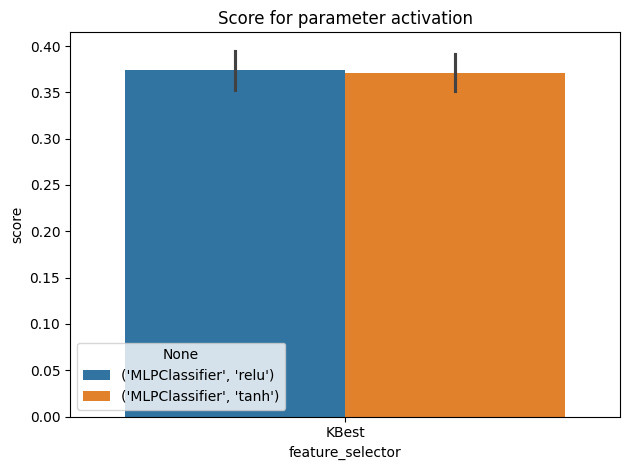

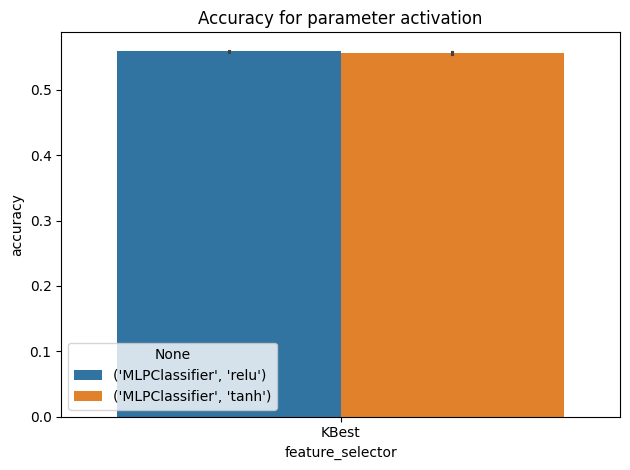

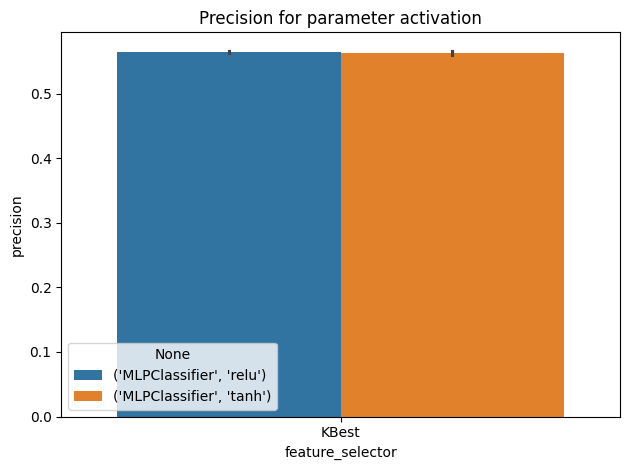

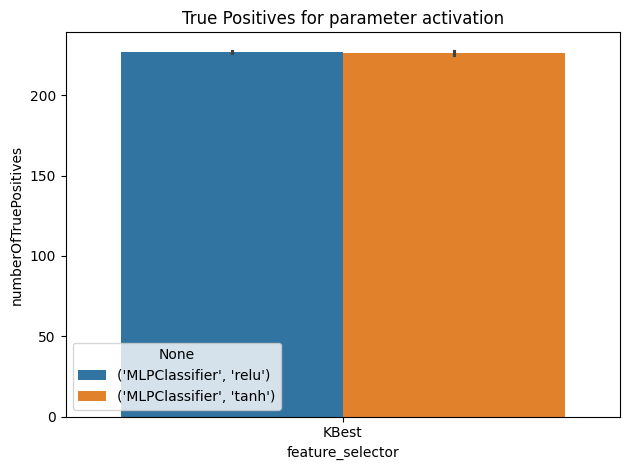

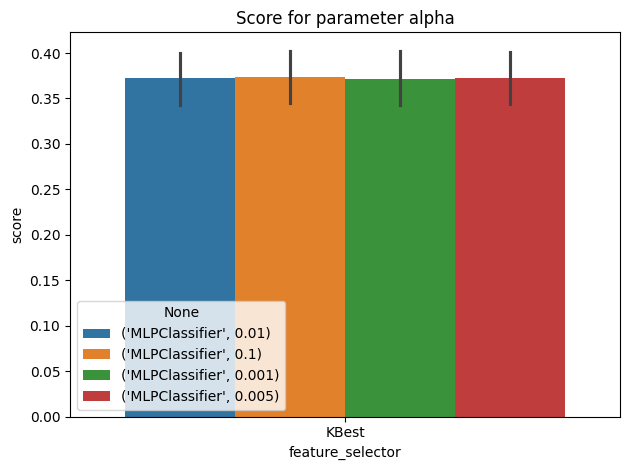

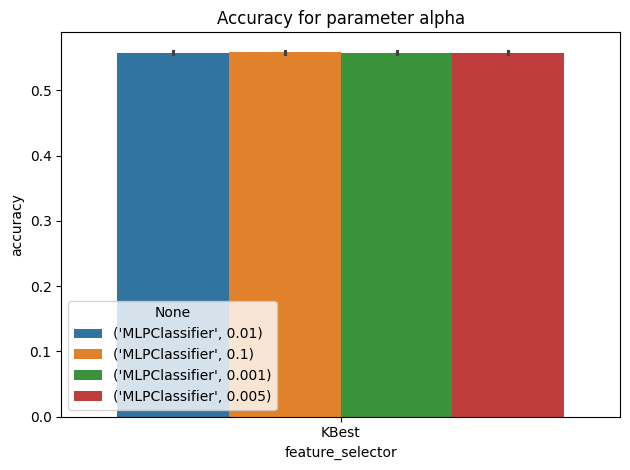

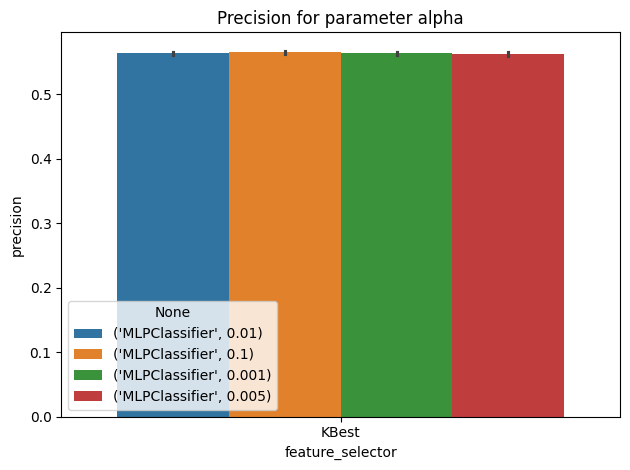

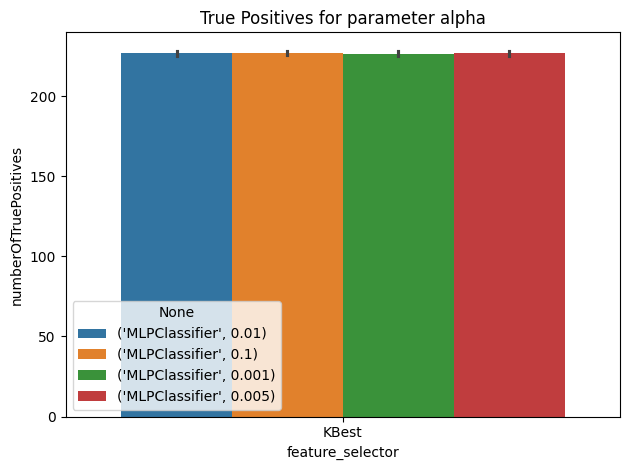

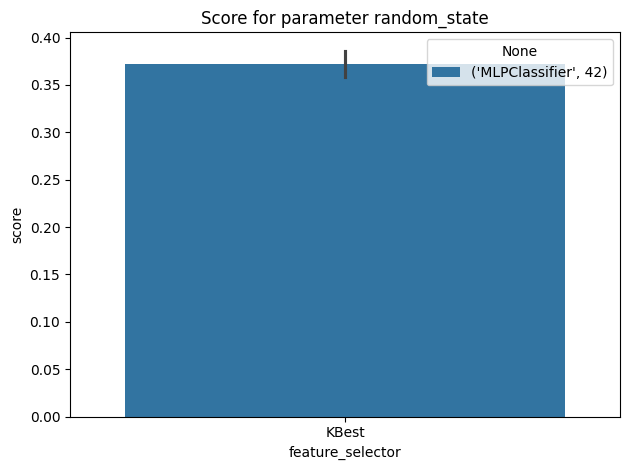

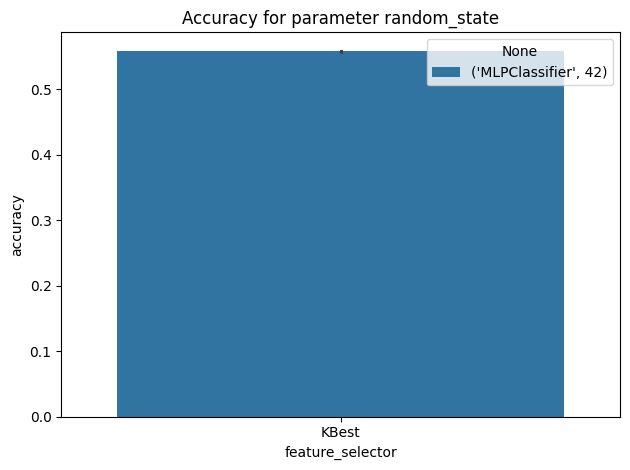

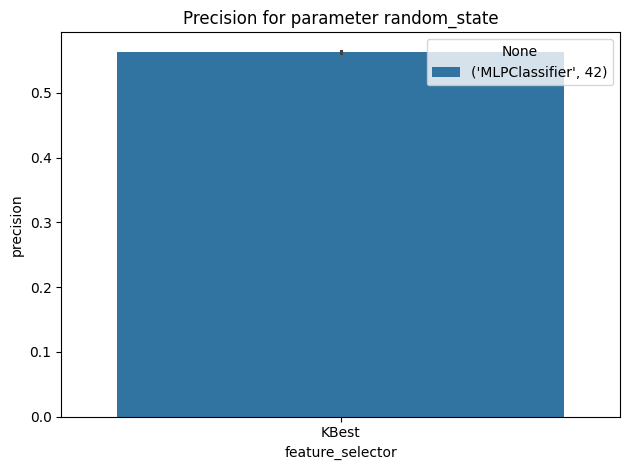

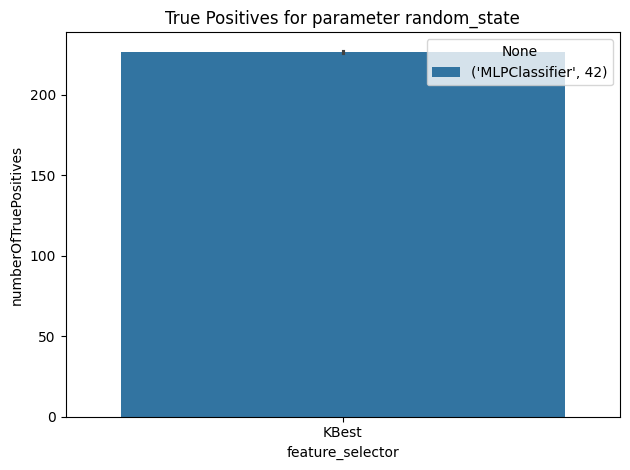

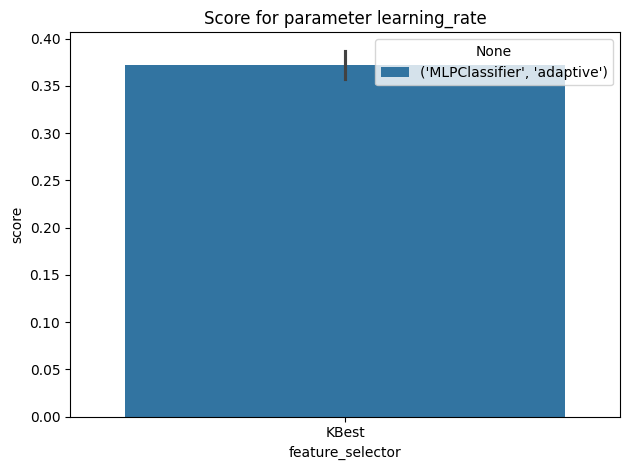

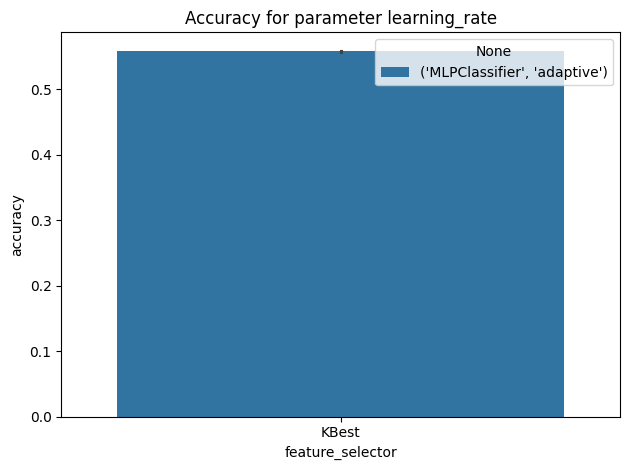

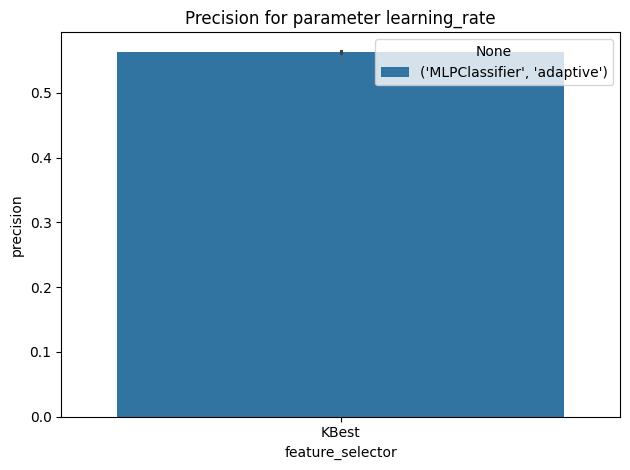

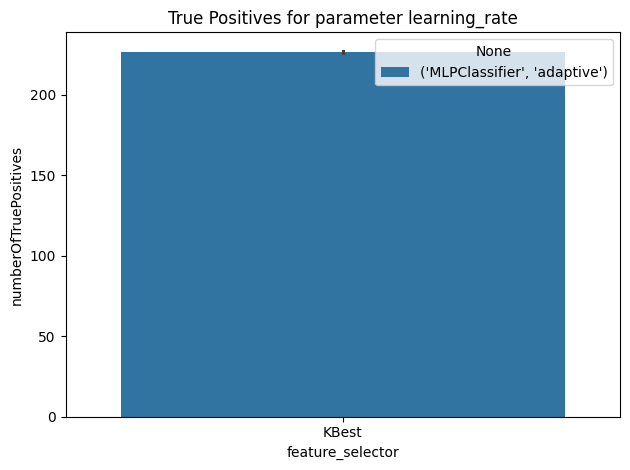

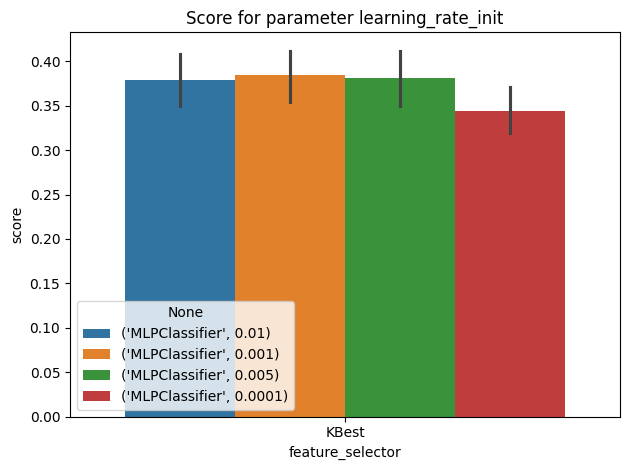

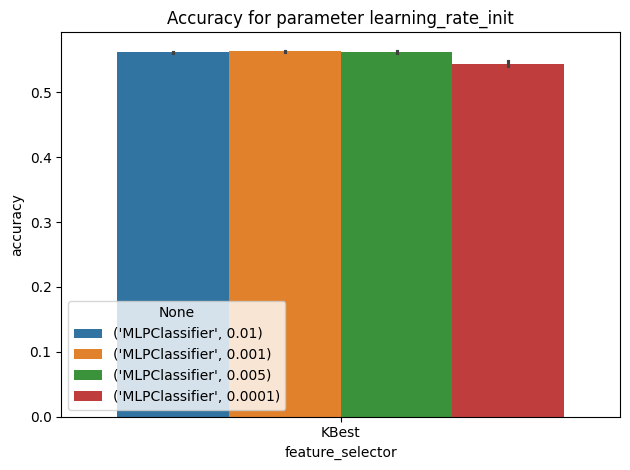

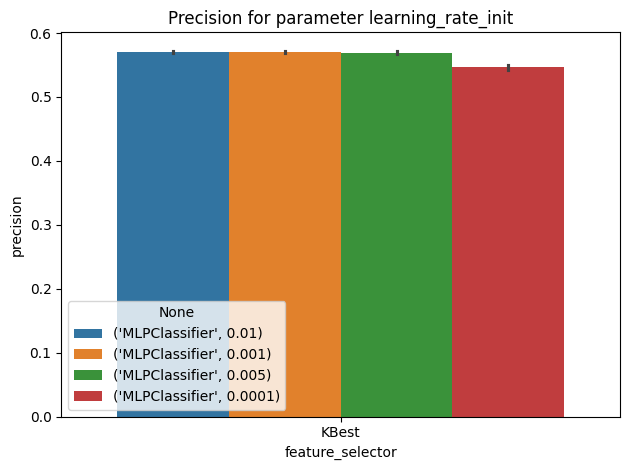

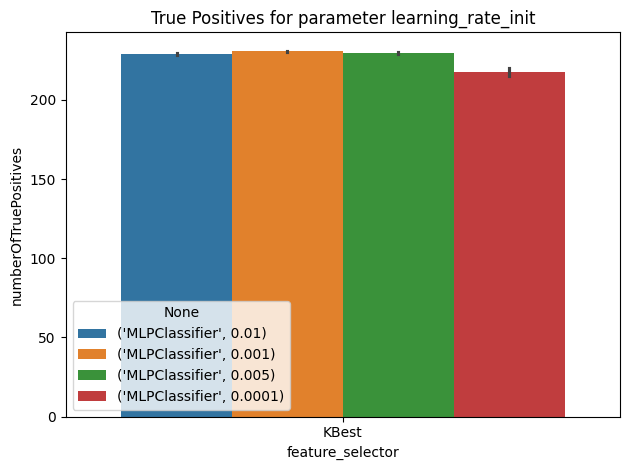

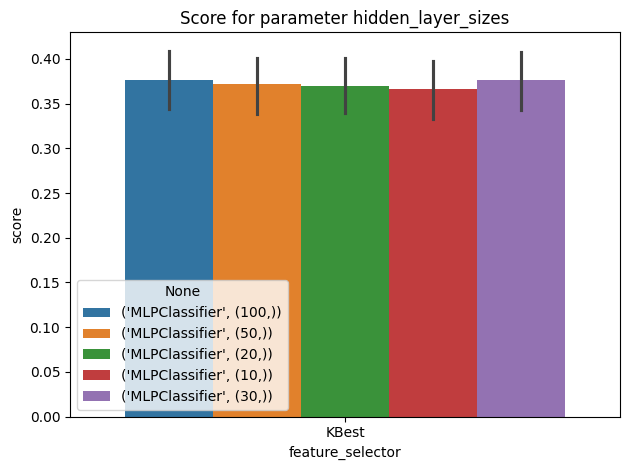

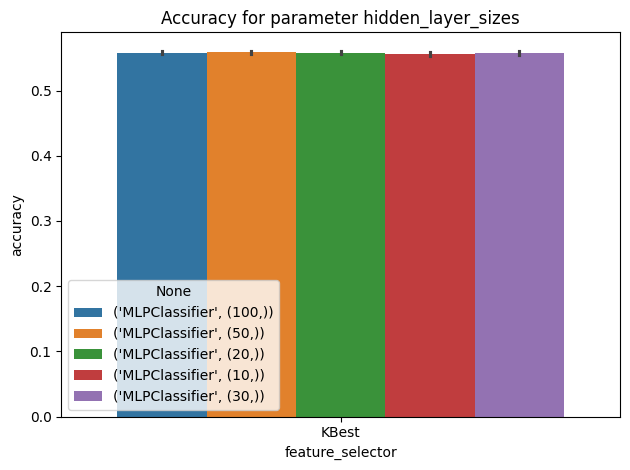

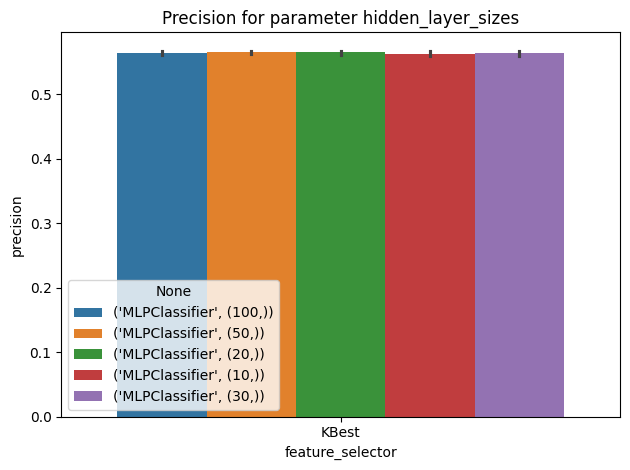

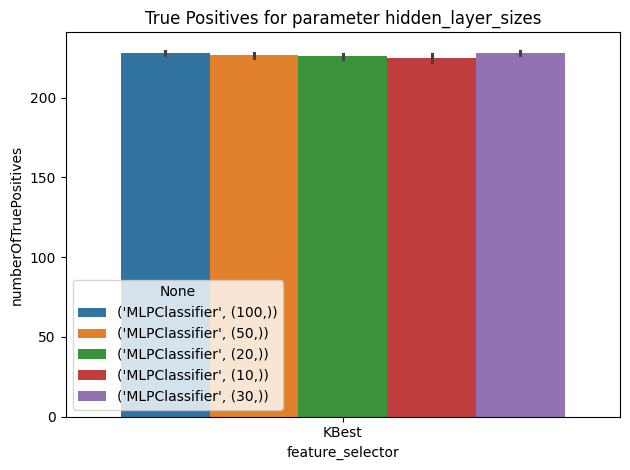

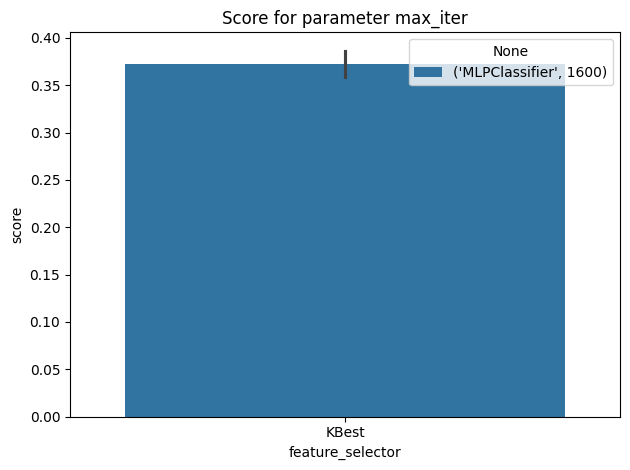

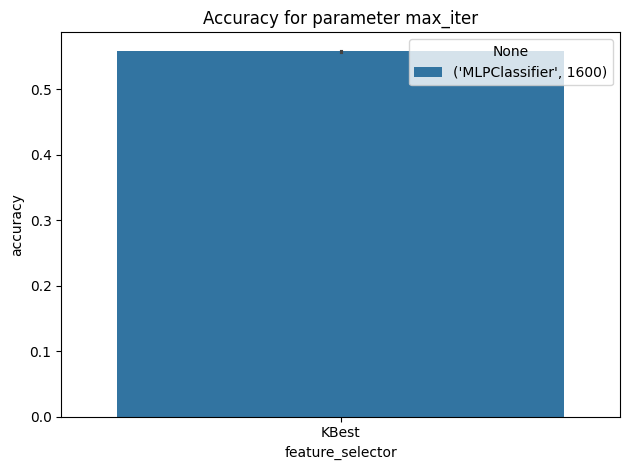

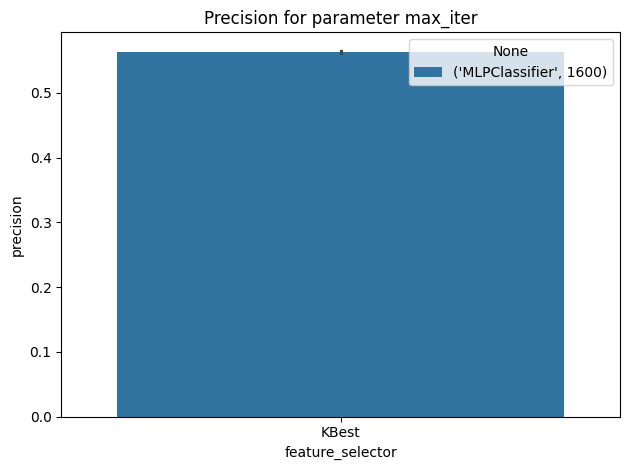

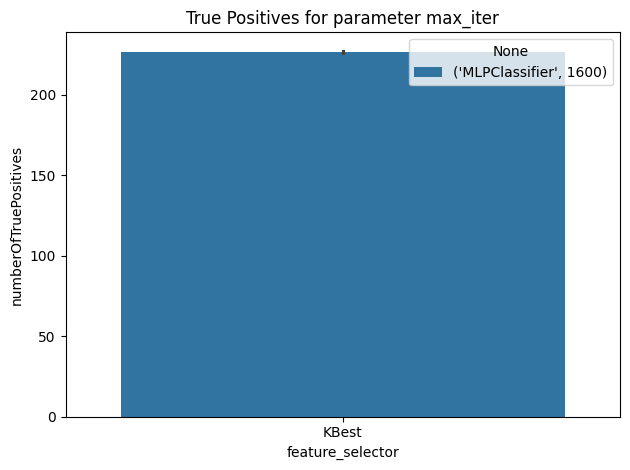

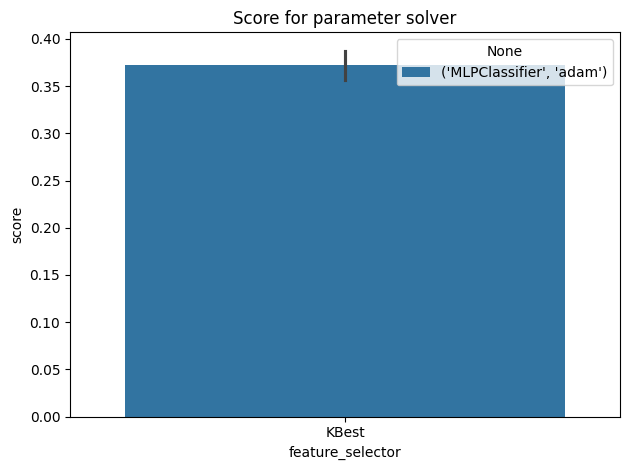

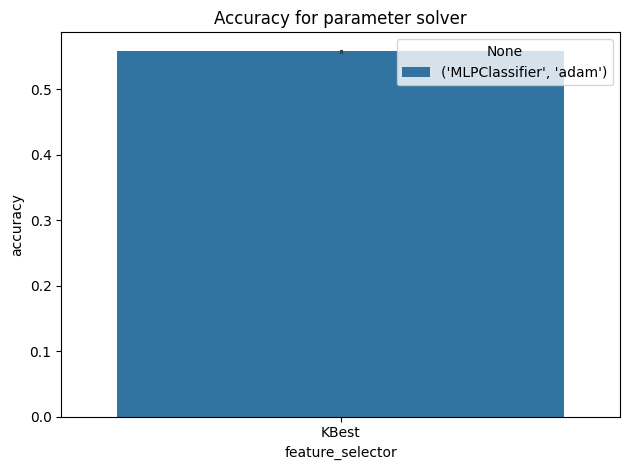

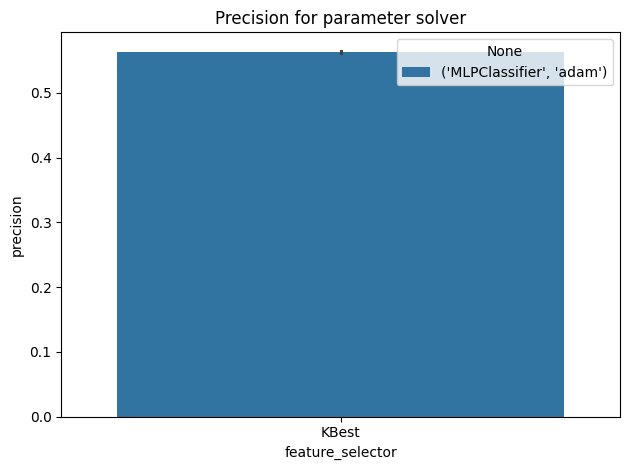

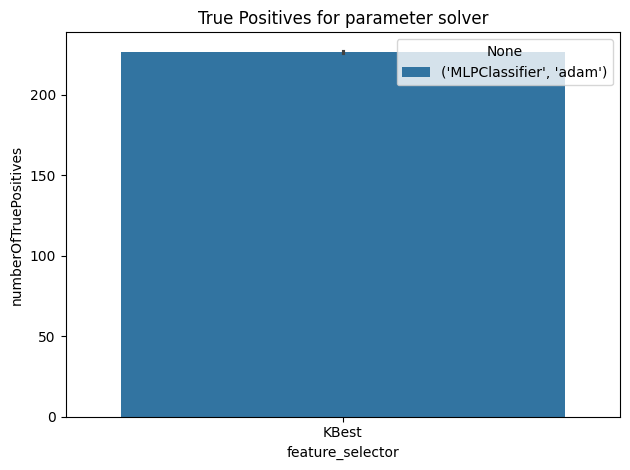

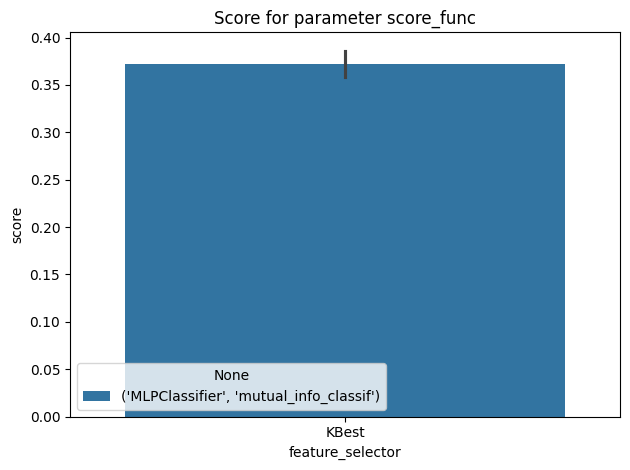

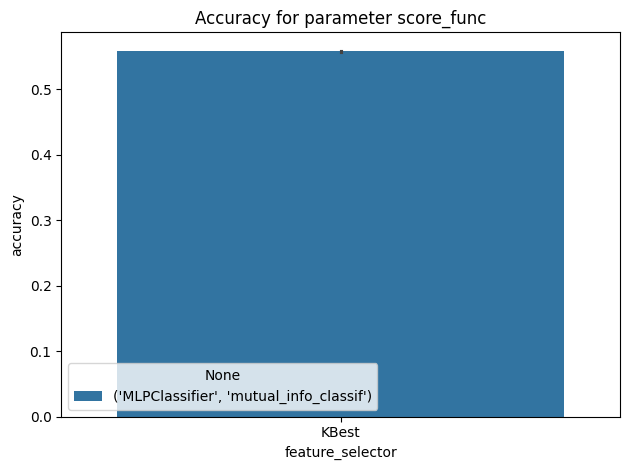

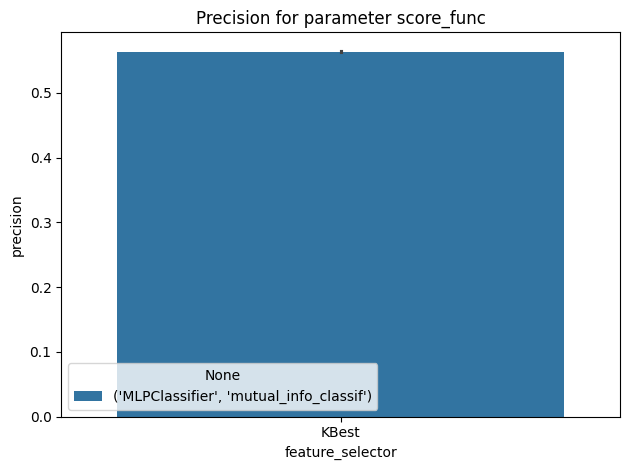

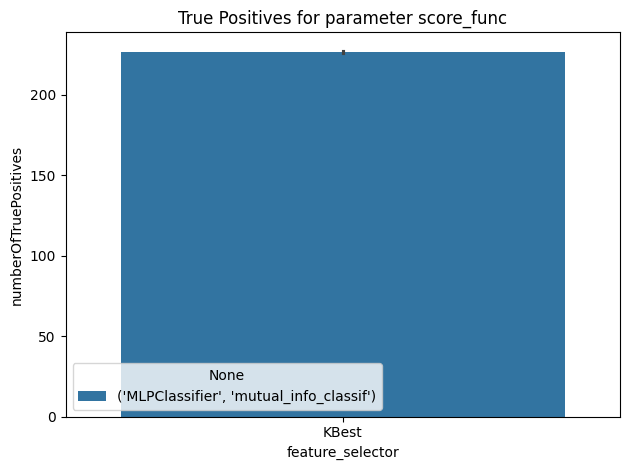

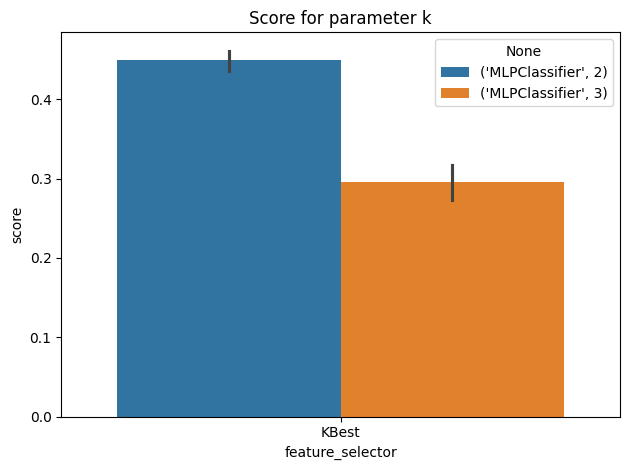

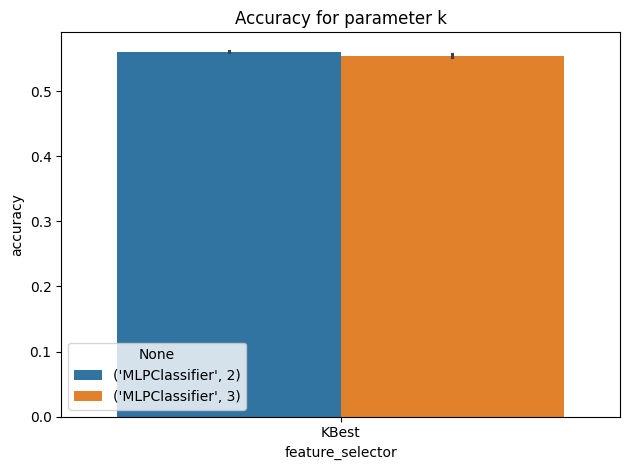

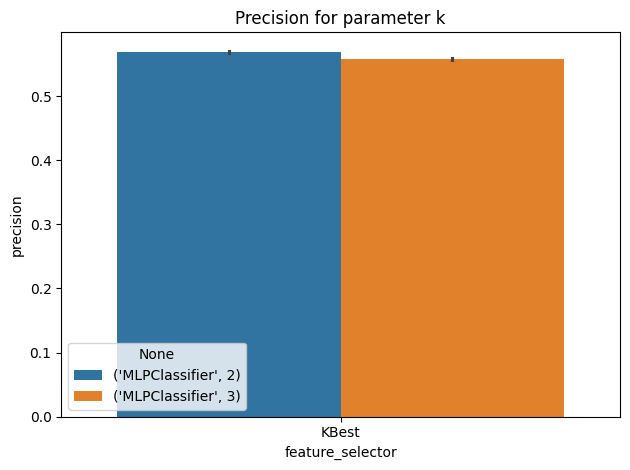

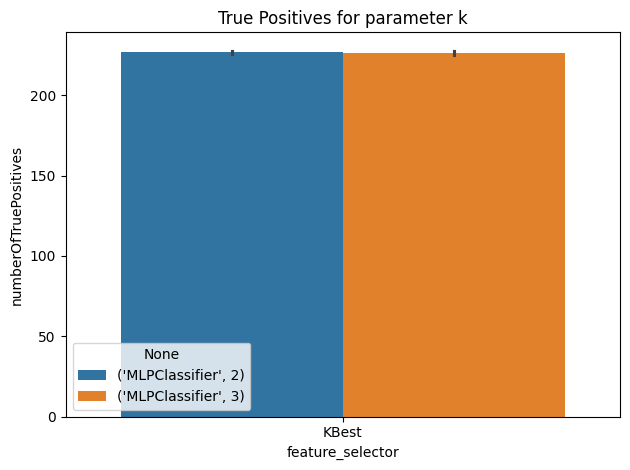

TypeError: boolean value of NA is ambiguous

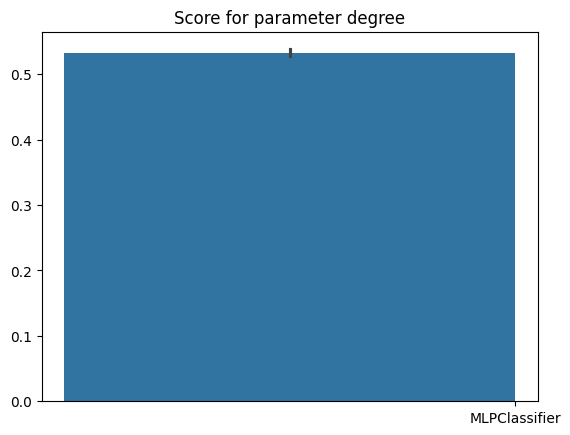

In [13]:
%%time
processedResultsDf, parameters = functions.extractParameterResultsArr(
    resultsDf,
    [models, featureSelectors, scalers, featureGenerators],
    [
        "model_parameters",
        "selector_parameters",
        "scaler_parameters",
        "feature_generator_parameters",
    ],
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

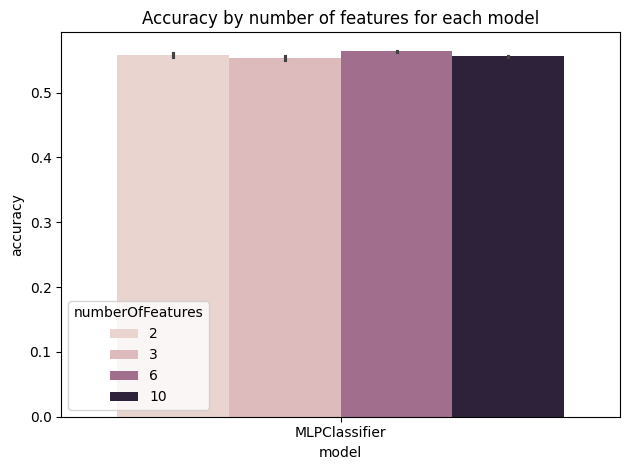

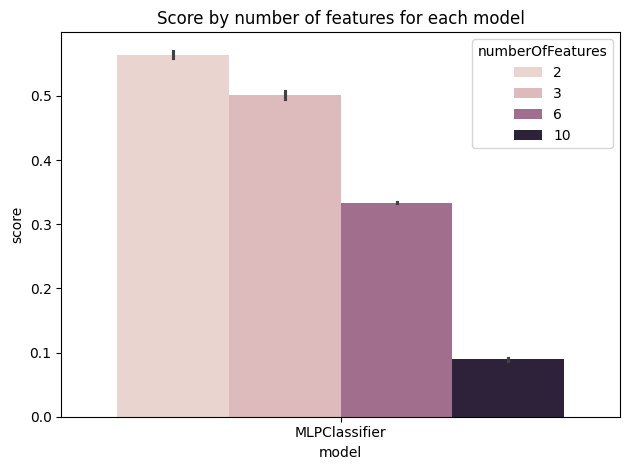

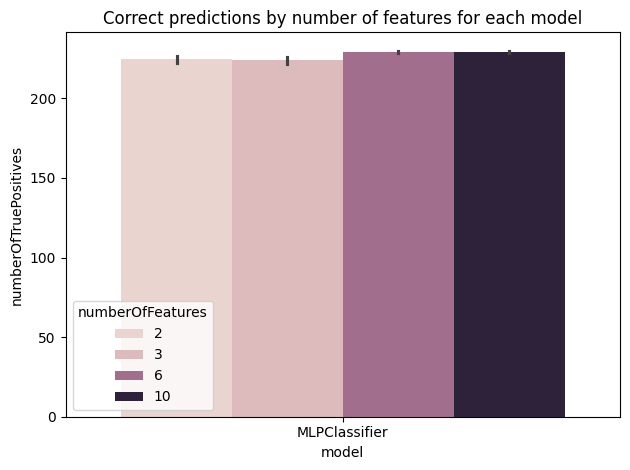

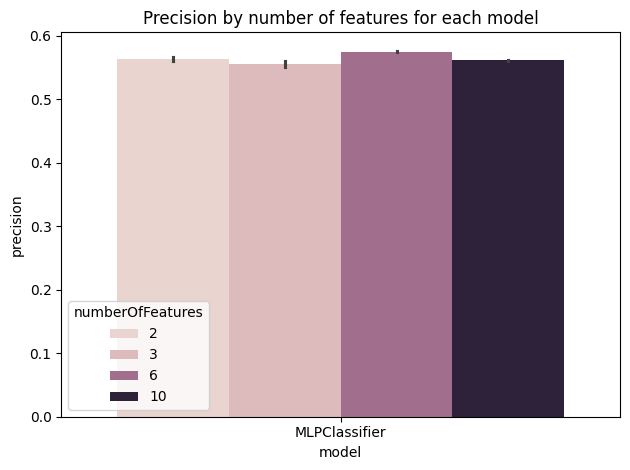

In [14]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

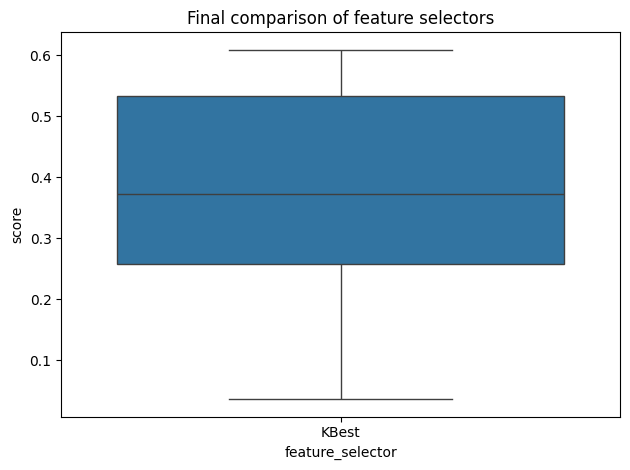

In [15]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

<Axes: xlabel='model', ylabel='score'>

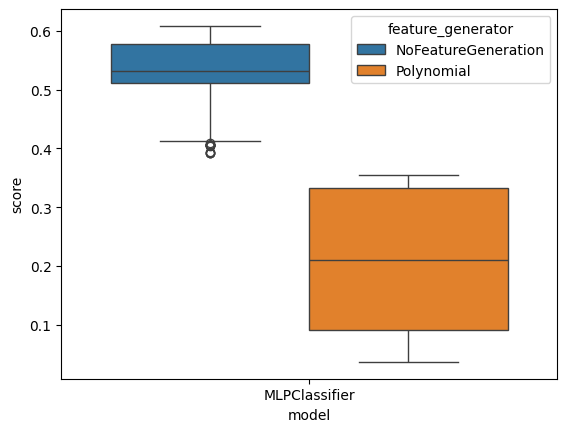

In [16]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="feature_generator")

<Axes: xlabel='model', ylabel='score'>

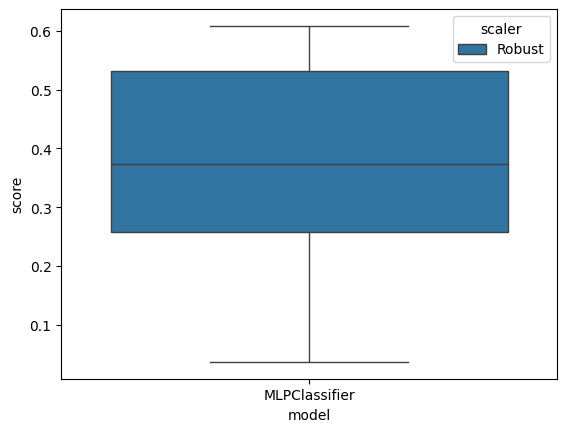

In [17]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="scaler")

### Final Results for Models

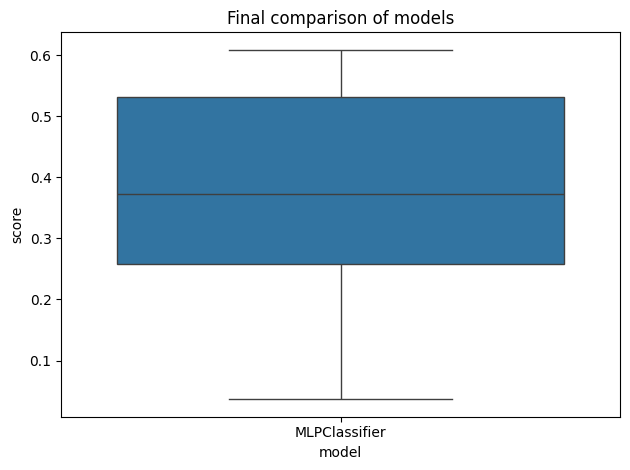

In [18]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")
plt.tight_layout()
plt.show()

### Final Results

In [19]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 927 µs


In [20]:
processedResultsDf[
    processedResultsDf["model"] == functions.ModelType.XGBoost.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_activation, model_parameters_alpha, model_parameters_random_state, model_parameters_learning_rate, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_max_iter, model_parameters_solver, selector_parameters_score_func, selector_parameters_k, feature_generator_parameters_degree]
Index: []

[0 rows x 24 columns]

In [35]:
processedResultsDf.sort_values(by="numberOfTruePositives", ascending=False).head(5)

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
102  0.608563                    239  0.561818   0.576355                 2   
389  0.544343                    238  0.559394   0.561210                 3   
383  0.544343                    238  0.556364   0.552632                 3   
523  0.116208                    238  0.560606   0.569678                10   
323  0.544343                    238  0.558788   0.555000                 3   

             model                                   model_parameters  \
102  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   
389  MLPClassifier  {'activation': 'relu', 'solver': 'adam', 'alph...   
383  MLPClassifier  {'activation': 'relu', 'solver': 'adam', 'alph...   
523  MLPClassifier  {'activation': 'relu', 'solver': 'adam', 'alph...   
323  MLPClassifier  {'activation': 'relu', 'solver': 'adam', 'alph...   

    feature_selector                                selector_parameters  \
102            KBest  {'score_func': <function mutual_info_classif a...   
389            KBest  {'score_func': <function mutual_info_classif a...   
383            KBest  {'score_func': <function mutual_info_classif a...   
523            KBest  {'score_func': <function mutual_info_classif a...   
323            KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_alpha model_parameters_random_state  \
102  Robust  ...                  0.100                            42   
389  Robust  ...                  0.005                            42   
383  Robust  ...                  0.005                            42   
523  Robust  ...                  0.001                            42   
323  Robust  ...                  0.010                            42   

    model_parameters_learning_rate model_parameters_learning_rate_init  \
102                       adaptive                               0.010   
389                       adaptive                               0.001   
383                       adaptive                               0.010   
523                       adaptive                               0.010   
323                       adaptive                               0.010   

     model_parameters_hidden_layer_sizes  model_parameters_max_iter  \
102                                (20,)                       1600   
389                                (30,)                       1600   
383                                (10,)                       1600   
523                                (10,)                       1600   
323                                (10,)                       1600   

    model_parameters_solver  selector_parameters_score_func  \
102                    adam             mutual_info_classif   
389                    adam             mutual_info_classif   
383                    adam             mutual_info_classif   
523                    adam             mutual_info_classif   
323                    adam             mutual_info_classif   

    selector_parameters_k  feature_generator_parameters_degree  
102                     2                                 <NA>  
389                     3                                 <NA>  
383                     3                                 <NA>  
523                     3                                    2  
323                     3                                 <NA>  

[5 rows x 24 columns]

In [34]:
processedResultsDf[
    processedResultsDf["feature_generator"]
    == functions.FeatureGenerator.Polynomial.name
].sort_values(by="numberOfTruePositives", ascending=False).head(5)

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
523  0.116208                    238  0.560606   0.569678                10   
628  0.113150                    237  0.561818   0.571649                10   
603  0.113150                    237  0.549091   0.555556                10   
568  0.113150                    237  0.561818   0.571649                10   
588  0.113150                    237  0.563030   0.576244                10   

             model                                   model_parameters  \
523  MLPClassifier  {'activation': 'relu', 'solver': 'adam', 'alph...   
628  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   
603  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   
568  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   
588  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   

    feature_selector                                selector_parameters  \
523            KBest  {'score_func': <function mutual_info_classif a...   
628            KBest  {'score_func': <function mutual_info_classif a...   
603            KBest  {'score_func': <function mutual_info_classif a...   
568            KBest  {'score_func': <function mutual_info_classif a...   
588            KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_alpha model_parameters_random_state  \
523  Robust  ...                  0.001                            42   
628  Robust  ...                  0.005                            42   
603  Robust  ...                  0.001                            42   
568  Robust  ...                  0.010                            42   
588  Robust  ...                  0.100                            42   

    model_parameters_learning_rate model_parameters_learning_rate_init  \
523                       adaptive                               0.010   
628                       adaptive                               0.001   
603                       adaptive                               0.010   
568                       adaptive                               0.001   
588                       adaptive                               0.001   

     model_parameters_hidden_layer_sizes  model_parameters_max_iter  \
523                                (10,)                       1600   
628                                (10,)                       1600   
603                                (10,)                       1600   
568                                (10,)                       1600   
588                                (10,)                       1600   

    model_parameters_solver  selector_parameters_score_func  \
523                    adam             mutual_info_classif   
628                    adam             mutual_info_classif   
603                    adam             mutual_info_classif   
568                    adam             mutual_info_classif   
588                    adam             mutual_info_classif   

    selector_parameters_k  feature_generator_parameters_degree  
523                     3                                    2  
628                     3                                    2  
603                     3                                    2  
568                     3                                    2  
588                     3                                    2  

[5 rows x 24 columns]

In [21]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_activation, model_parameters_alpha, model_parameters_random_state, model_parameters_learning_rate, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_max_iter, model_parameters_solver, selector_parameters_score_func, selector_parameters_k, feature_generator_parameters_degree]
Index: []

[0 rows x 24 columns]

In [22]:
filteredDf["scaler"]

102    Robust
Name: scaler, dtype: object

In [23]:
filteredDf["model_parameters"].to_numpy()

array([{'activation': 'tanh', 'solver': 'adam', 'alpha': 0.1, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (20,), 'max_iter': 1600, 'random_state': 42}],
      dtype=object)

In [24]:
filteredDf["feature_generator"]

102    NoFeatureGeneration
Name: feature_generator, dtype: object

In [25]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
102  0.608563                    239  0.561818   0.576355                 2   

             model                                   model_parameters  \
102  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   

    feature_selector                                selector_parameters  \
102            KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_alpha model_parameters_random_state  \
102  Robust  ...                    0.1                            42   

    model_parameters_learning_rate model_parameters_learning_rate_init  \
102                       adaptive                                0.01   

     model_parameters_hidden_layer_sizes  model_parameters_max_iter  \
102                                (20,)                       1600   

    model_parameters_solver  selector_parameters_score_func  \
102                    adam             mutual_info_classif   

    selector_parameters_k  feature_generator_parameters_degree  
102                     2                                 <NA>  

[1 rows x 24 columns]

In [26]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 999 µs


In [27]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_activation, model_parameters_alpha, model_parameters_random_state, model_parameters_learning_rate, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_max_iter, model_parameters_solver, selector_parameters_score_func, selector_parameters_k, feature_generator_parameters_degree]
Index: []

[0 rows x 24 columns]

In [28]:
filteredDf["scaler"]

102    Robust
Name: scaler, dtype: object

In [29]:
filteredDf["model_parameters"].to_numpy()

array([{'activation': 'tanh', 'solver': 'adam', 'alpha': 0.1, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (20,), 'max_iter': 1600, 'random_state': 42}],
      dtype=object)

In [30]:
filteredDf["feature_generator"]

102    NoFeatureGeneration
Name: feature_generator, dtype: object

In [31]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
102  0.608563                    239  0.561818   0.576355                 2   

             model                                   model_parameters  \
102  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   

    feature_selector                                selector_parameters  \
102            KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_alpha model_parameters_random_state  \
102  Robust  ...                    0.1                            42   

    model_parameters_learning_rate model_parameters_learning_rate_init  \
102                       adaptive                                0.01   

     model_parameters_hidden_layer_sizes  model_parameters_max_iter  \
102                                (20,)                       1600   

    model_parameters_solver  selector_parameters_score_func  \
102                    adam             mutual_info_classif   

    selector_parameters_k  feature_generator_parameters_degree  
102                     2                                 <NA>  

[1 rows x 24 columns]

# Batch 2

## Consts

In [36]:
RESULTS_FILENAME = "./Results/Limited/MLP/results-2"

## Experiment

### Parameters

In [37]:
# HistGradientBoostingClassifier
learning_rate = [0.1, 0.01]
max_depth = [2, 3, 5, None]
random_state = [42]
max_features = [3, 5, 8, 1.0]
l2_regularization = [0, 0.5, 0.8]
histGradientBoostingParameters = functions.generateParameters(
    [learning_rate, max_depth, random_state, max_features, l2_regularization], globals()
)

# LDA
solver = ["svd", "lsqr"]
shrinkage = [None, "auto"]
n_components = [3, 5, 8, None]
ldaParameters = functions.generateParameters(
    [solver, shrinkage, n_components], globals()
)


# QDA
reg_param = [0, 0.3, 0.5, 0.8]
qdaParameters = functions.generateParameters([reg_param], globals())

# KNN
n_neighbors = [3, 5, 8]
weights = ["uniform", "distance"]
p = [1, 2]
leaf_size = [15, 30, 50]
knnParameters = functions.generateParameters(
    [n_neighbors, weights, p, leaf_size], globals()
)

# SVM
C = [0.5, 1.0, 1.5]
kernel = ["linear", "rbf", "sigmoid", "poly"]
svcParameters = functions.generateParameters([C, kernel], globals())

# GradientBoostingClassifier
loss = ["exponential"]
learning_rate = [0.001]
n_estimators = [800]
min_samples_split = [2]
min_samples_leaf = [5, 7]
subsample = [1.0]
max_depth = [5, 8]
min_impurity_decrease = [1]
random_state = [42]
max_features = [None]
ccp_alpha = [0]
gradientBoostingParameters = functions.generateParameters(
    [
        loss,
        learning_rate,
        n_estimators,
        subsample,
        max_depth,
        random_state,
        max_features,
        ccp_alpha,
        min_samples_split,
        min_samples_leaf,
        min_impurity_decrease,
    ],
    globals(),
)


# MLPClassifier

activation = ["relu", "tanh", "logistic"]
beta_1= [0.9,0.95,0.85]
beta_2 = [0.999, 0.9 ,0.95]

solver = ["adam"]
alpha = [0.1, 0.2, 0.15, 0.05]
learning_rate = ["adaptive"]
learning_rate_init = [0.001, 0.005, 0.002, 0.003, 0.004, 0.009, 0.008, 0.007, 0.006]
hidden_layer_sizes = [
    (100,),
    (50,),
    (20,),
    (10,),
    (11,),
    (12,),
    (13,),
    (14,),
    (15,),
    (16,),
    (17,),
    (81,),
    (19,),
    (21,),
    (22,),
    (23,),
    (24,),
    (25,),
    (26,),
    (27,),
    (28,),
    (29,),
    (200,),
]
max_iter = [1600]
random_state = [42]
mlpClassifierParameters = functions.generateParameters(
    [
        activation,
        solver,
        alpha,
        learning_rate,
        learning_rate_init,
        hidden_layer_sizes,
        max_iter,
        random_state,
    ],
    globals(),
)
# Voting?
estimators = [
    [
        (
            "1",
            functions.GradientBoostingClassifier(
                loss="exponential",
                learning_rate=0.01,
                n_estimators=200,
                random_state=42,
            ),
        ),
        ("2", functions.MLPClassifier(max_iter=800, random_state=42)),
        ("3", functions.QuadraticDiscriminantAnalysis()),
    ]
]
voting = ["soft"]

votingParameters = functions.generateParameters([estimators, voting], globals())

# AdaBoost


estimator = [
    functions.GradientBoostingClassifier(
        loss="exponential",
        learning_rate=0.001,
        n_estimators=800,
        random_state=42,
    )
]
estimator = [functions.QuadraticDiscriminantAnalysis()]
n_estimators = [50]
learning_rate = [0.5, 0.1]
random_state = [42]

adaBoostParameters = functions.generateParameters(
    [estimator, n_estimators, learning_rate, random_state], globals()
)

# XGBOOST
max_depth = [2, 3]
eta = [0.001, 0.0001, 0.01]
objective = ["binary:logistic"]
nthread = [4, 2, 8]
eval_metric = ["auc"]
gamma = [0, 2, 10]
min_child_weight = [1, 5, 10]
max_delta_step = [0, 2, 8]
scale_pos_weight = [1, 1.2, 1.5]
refresh_leaf = [0, 1]
process_type = ["defualt", "update"]
num_parallel_tree = [1, 2, 5]
max_leaves = [0, 2, 5]
tree_method = ["exact", "approx", "hist"]

xGBoostParameters = functions.generateParameters(
    [max_depth, eta, objective, nthread, eval_metric], globals()
)


models = [
    # {"model": functions.ModelType.LDA, "parameters": ldaParameters},
    # {"model": functions.ModelType.QDA, "parameters": qdaParameters},
    # {"model": functions.ModelType.KNN, "parameters": knnParameters},
    # {"model": functions.ModelType.SVC, "parameters": svcParameters},
    # {
    #  "model": functions.ModelType.GradientBoosting,
    #  "parameters": gradientBoostingParameters,
    # },
    # {
    #     "model": functions.ModelType.HistGradientBoosting,
    #     "parameters": histGradientBoostingParameters,
    # },
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
    # {"model": functions.ModelType.ADABoost, "parameters": adaBoostParameters},
    # {"model": functions.ModelType.Voting, "parameters": votingParameters},
    # {"model": functions.ModelType.XGBoost, "parameters": xGBoostParameters},
]

In [38]:
# KBest
k = [2, 3]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01]
fprParameters = functions.generateParameters([score_func, alpha], globals())


# RFE
estimator = [SVC(kernel="linear")]
n_features_to_select = [2, 3]
step = [0.9]
rfeParameters = functions.generateParameters(
    [estimator, n_features_to_select, step], globals()
)


featureSelectors = [
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    # {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    # {"model": functions.FeatureSelectorType.RFE, "parameters": rfeParameters},
]

In [39]:
scalers = [
    # {"model": functions.Scaler.NoScaling, "parameters": [{}]},
    # {"model": functions.Scaler.Standard, "parameters": [{}]},
    {"model": functions.Scaler.Robust, "parameters": [{}]},
]

degree = [2]

polynomialParameters = functions.generateParameters([degree], globals())

featureGenerators = [
    {"model": functions.FeatureGenerator.NoFeatureGeneration, "parameters": [{}]},
    # {
    #   "model": functions.FeatureGenerator.Polynomial,
    #  "parameters": polynomialParameters,
    # },
]

### Conducting the experiment

In [40]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [41]:
%%time
results = functions.conductExperimentsWithScalersAndGenerators(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    scalers=scalers,
    featureGenerators=featureGenerators,
    getLimitedScore=True,
    limit=0.45,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/3312(approx) took (s): model: 0.67 selector 6.38 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000019AD6864900>, 'k': 2} ModelType.MLPClassifier {'activation': 'relu', 'solver': 'adam', 'alpha': 0.1, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 1600, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 2/3312(approx) took (s): model: 0.33 selector 6.38 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000019AD6864900>, 'k': 2} ModelType.MLPClassifier {'activation': 'relu', 'solver': 'adam', 'alpha': 0.1, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50,), 'max_iter': 1600, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 3/3312(approx) took (s): model: 0.1 selector 6.38 with: FeatureSelectorType.KBest {'score_func

## Results

In [42]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [43]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

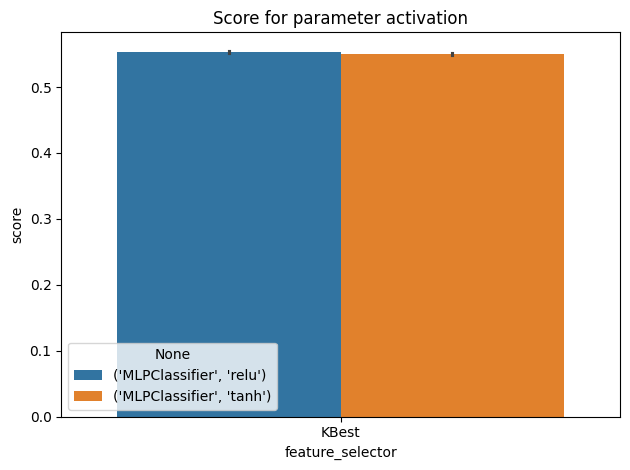

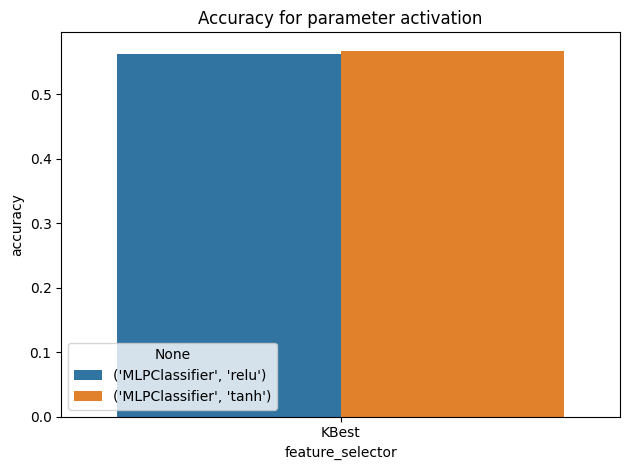

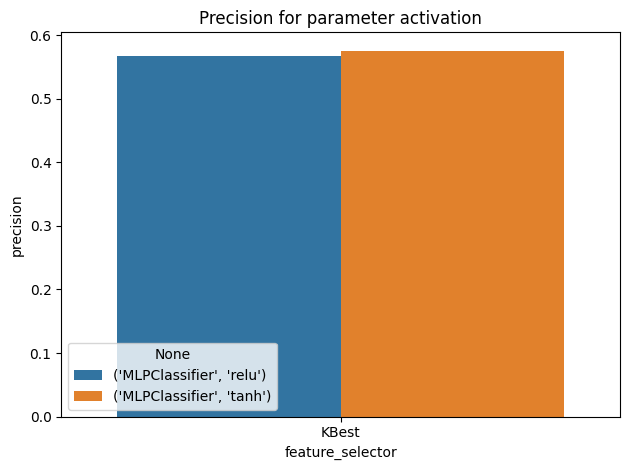

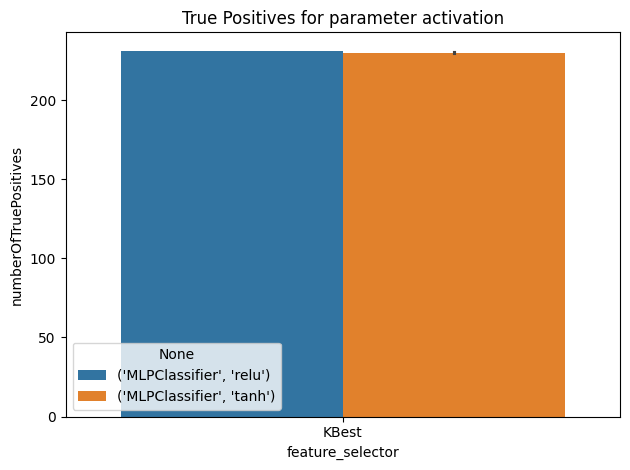

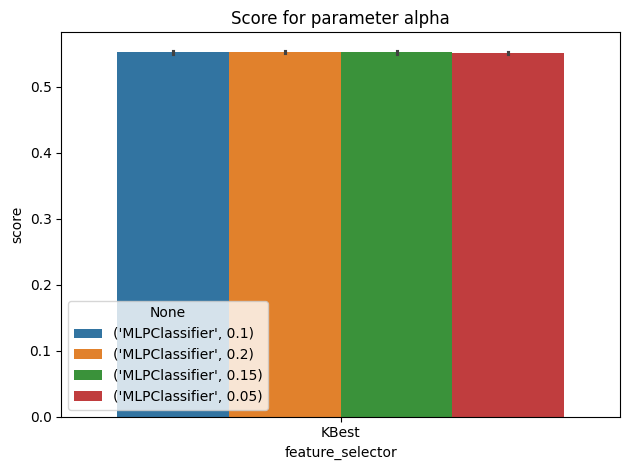

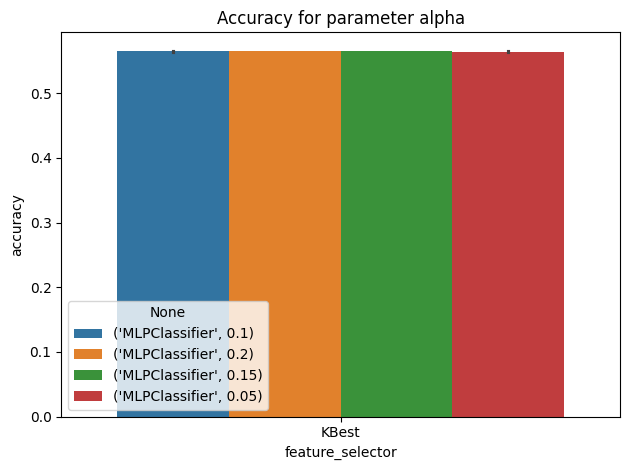

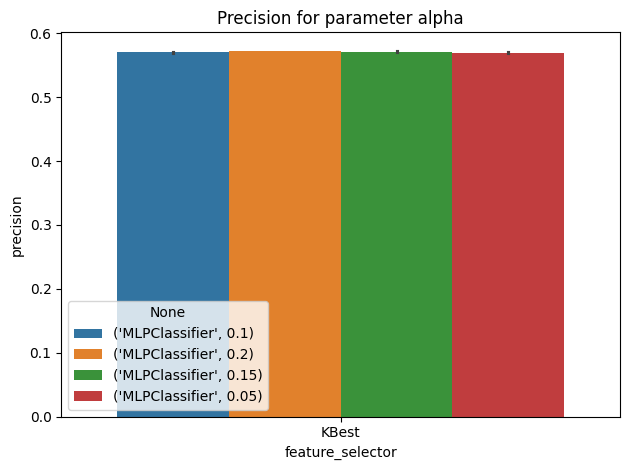

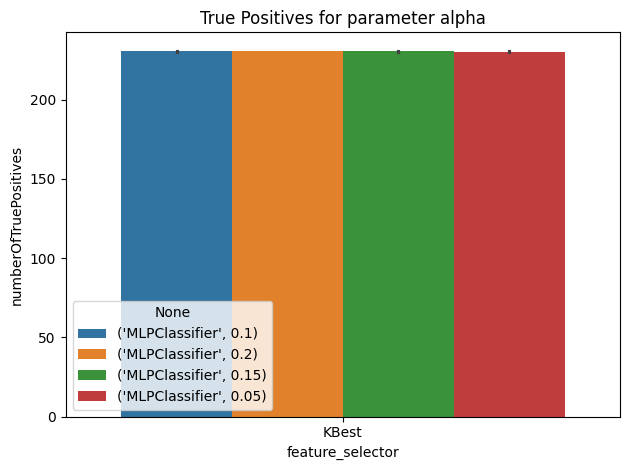

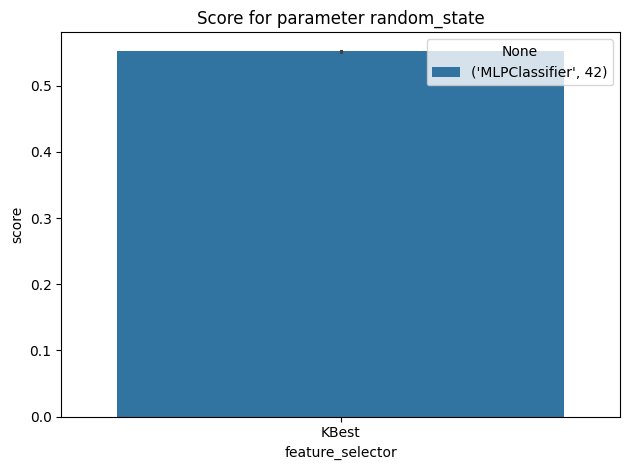

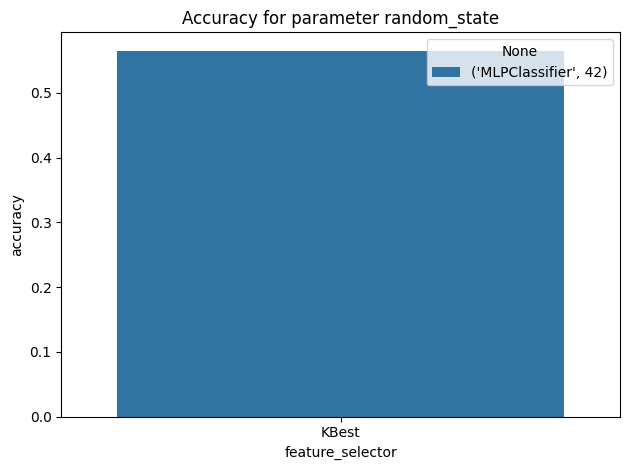

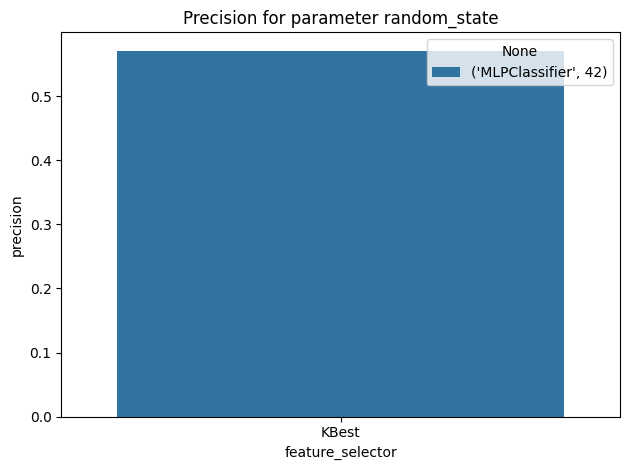

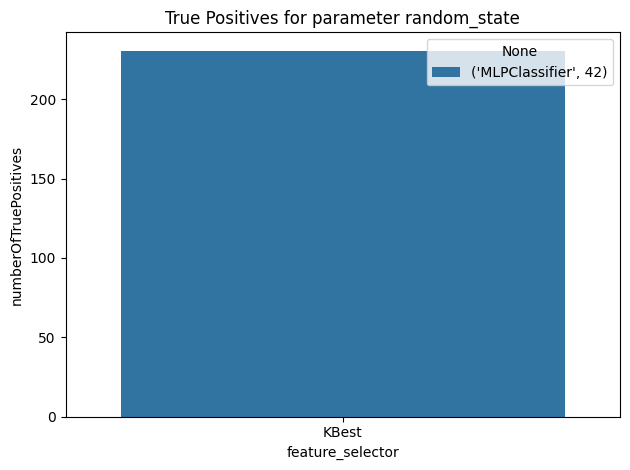

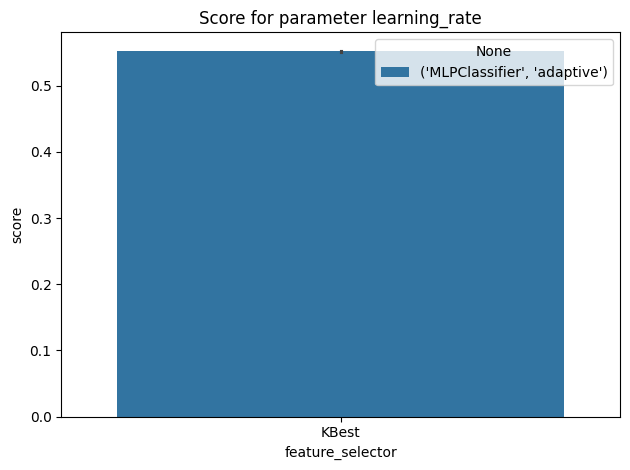

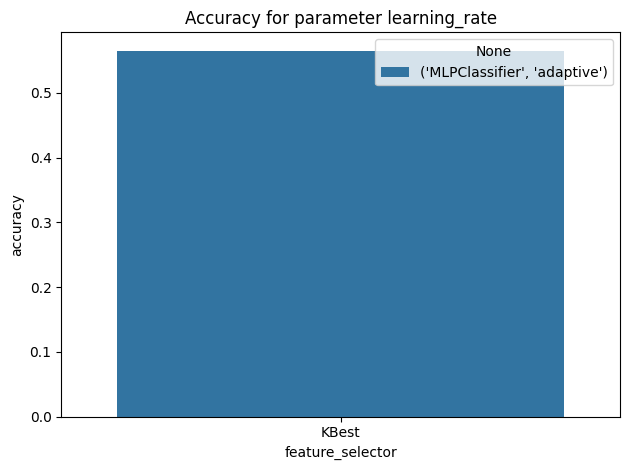

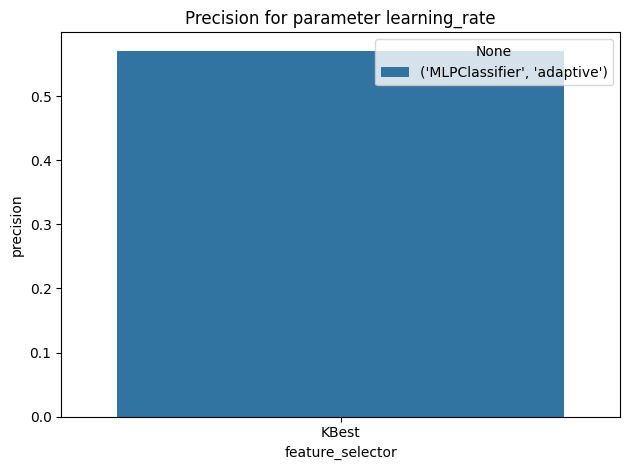

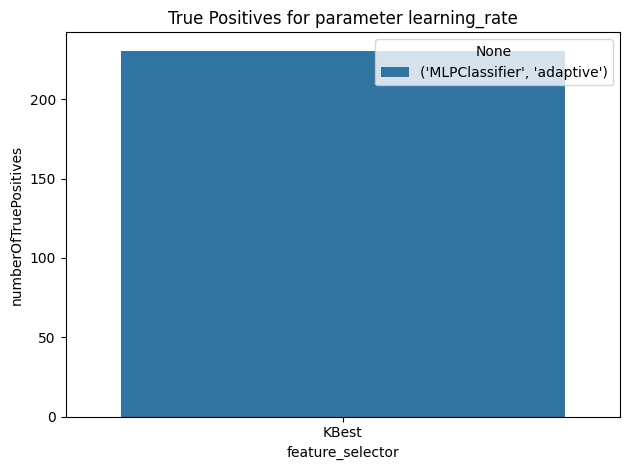

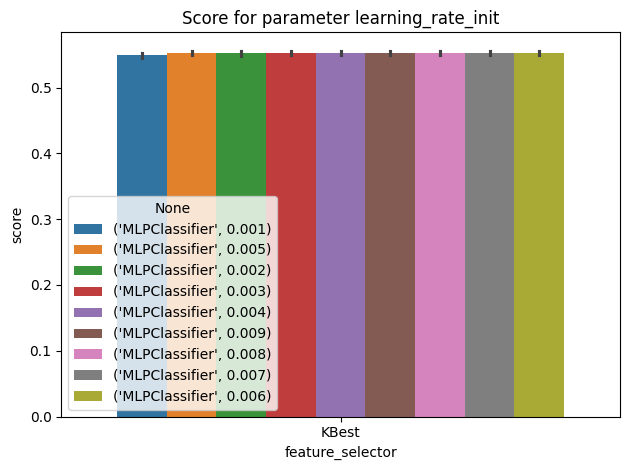

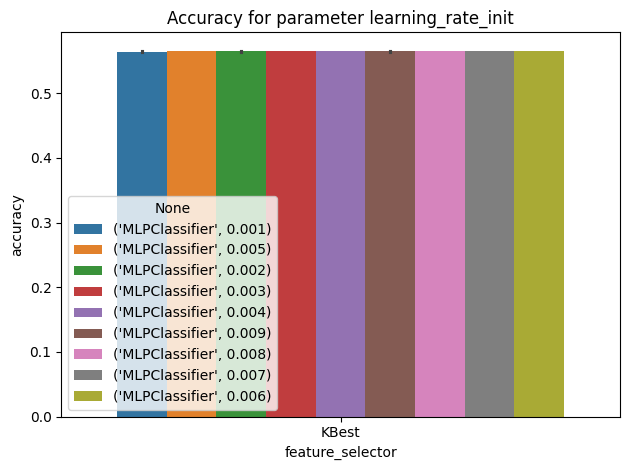

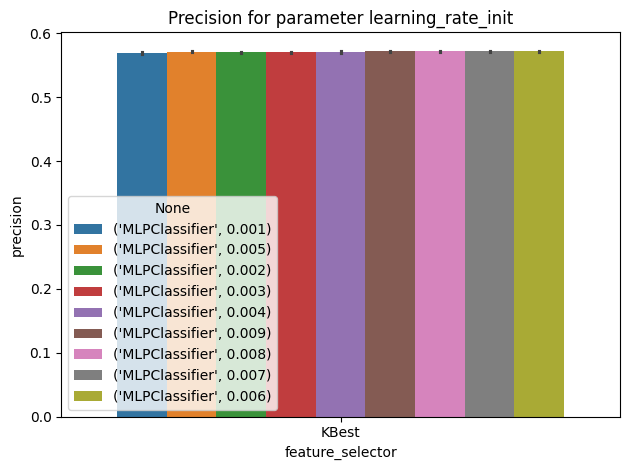

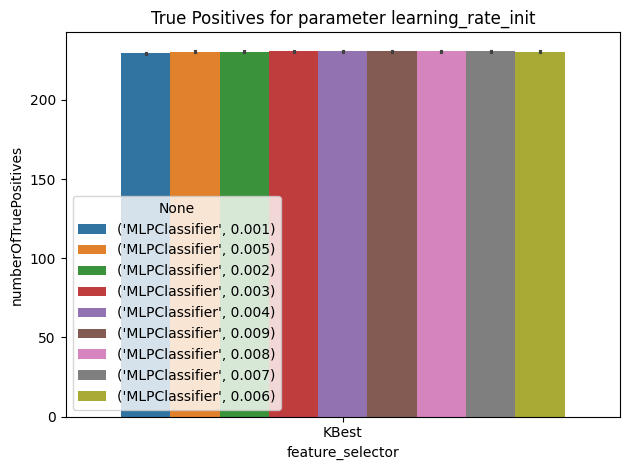

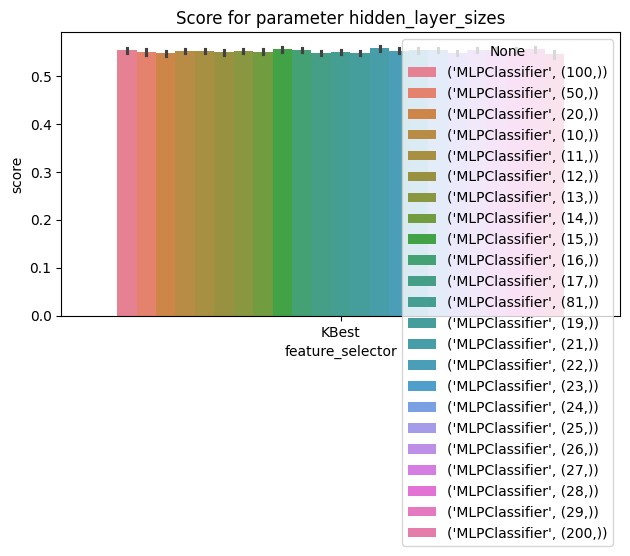

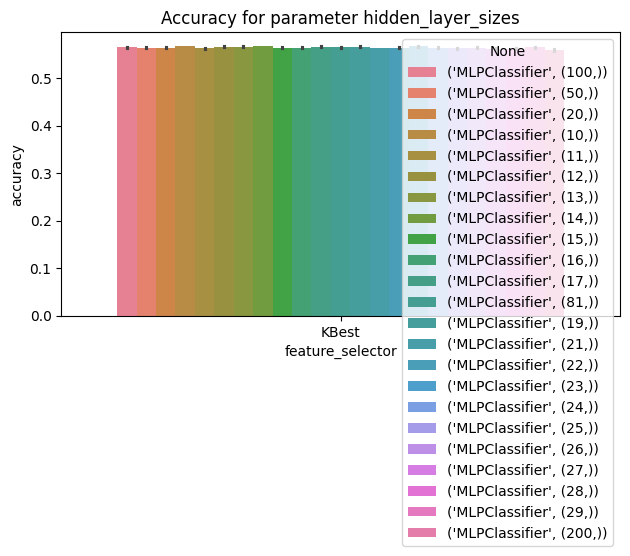

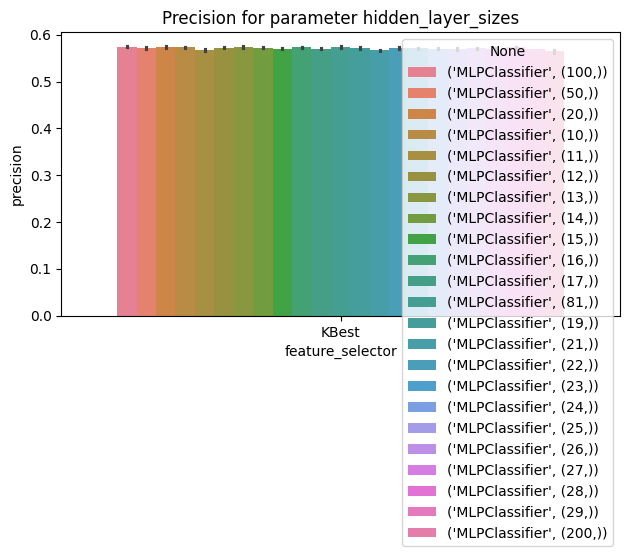

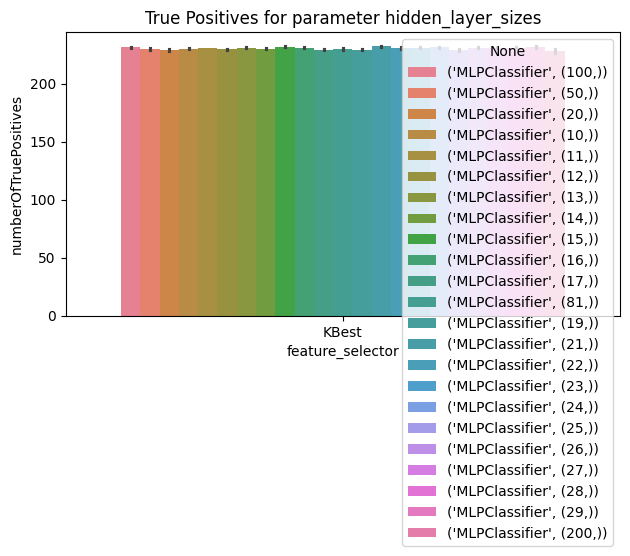

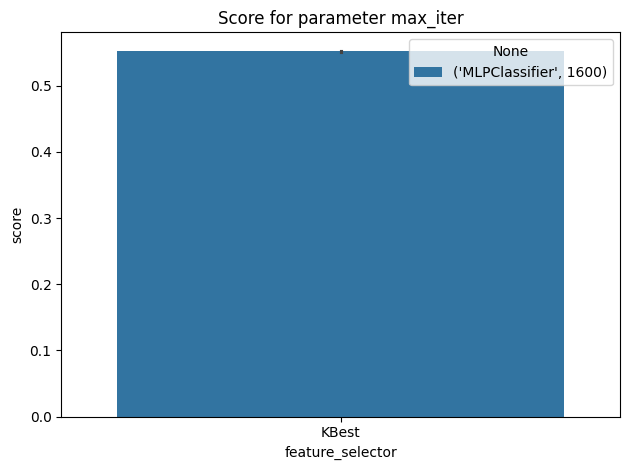

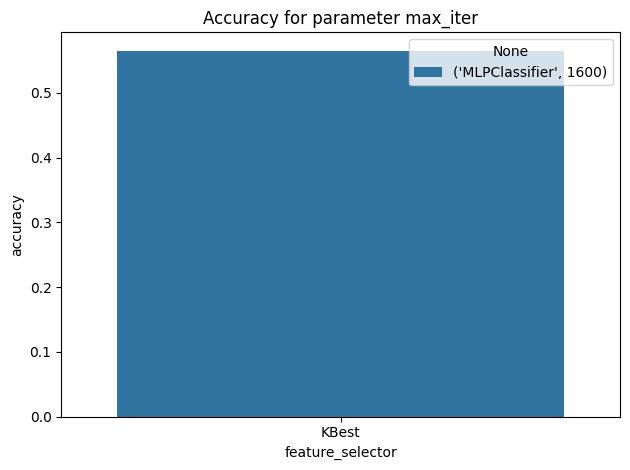

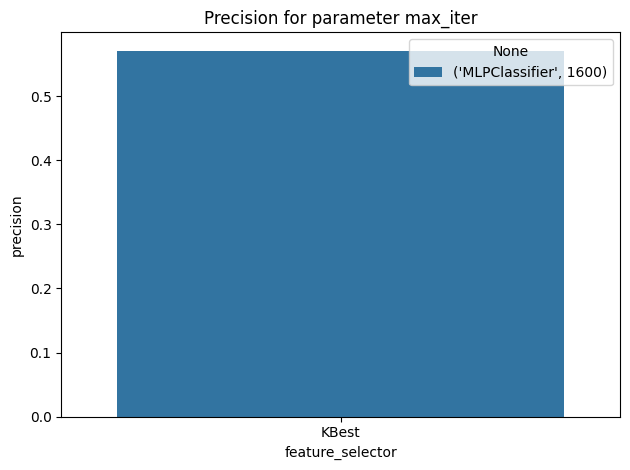

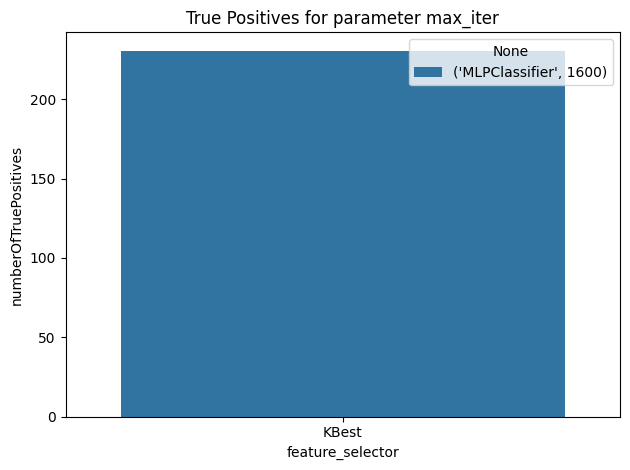

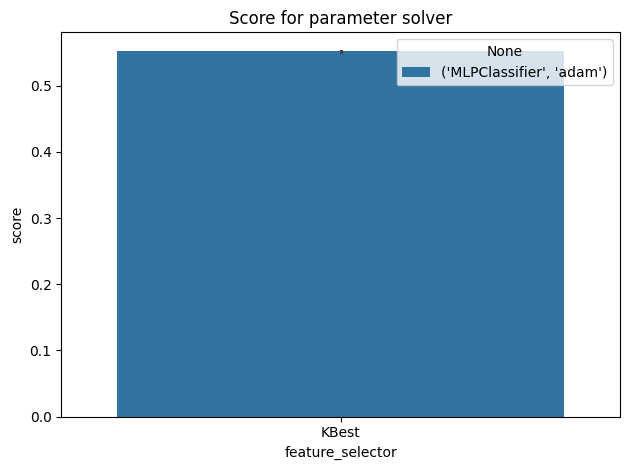

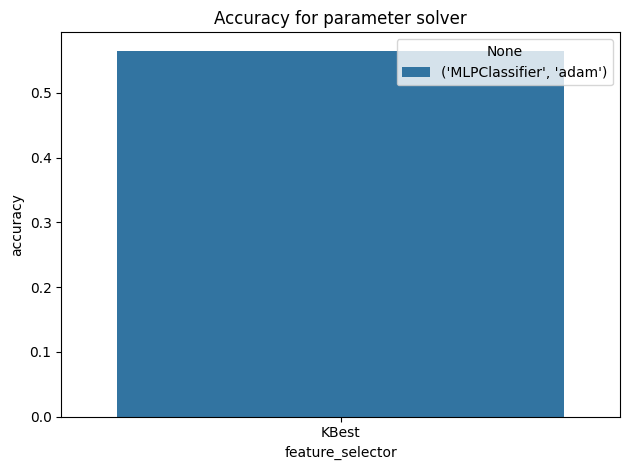

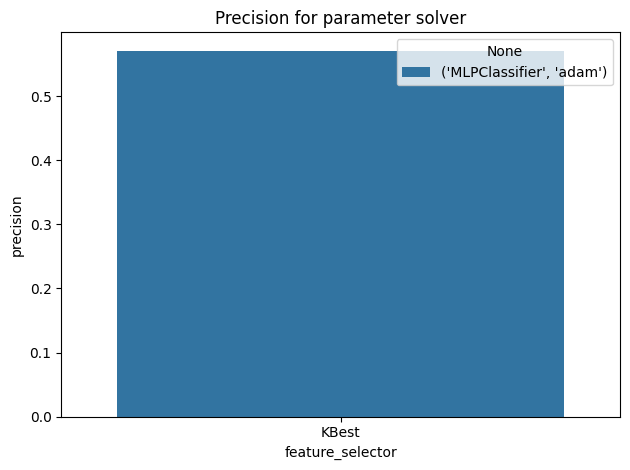

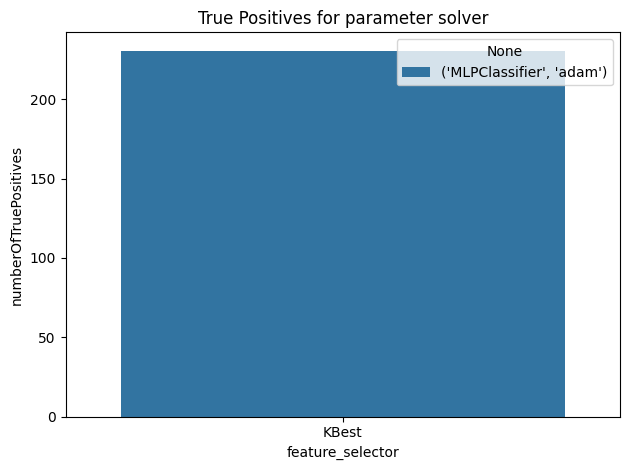

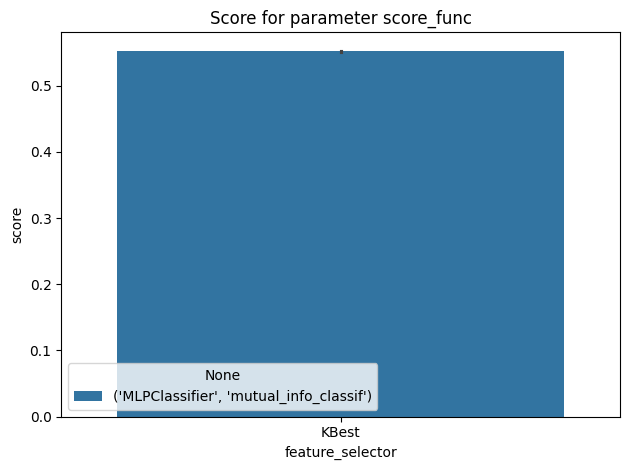

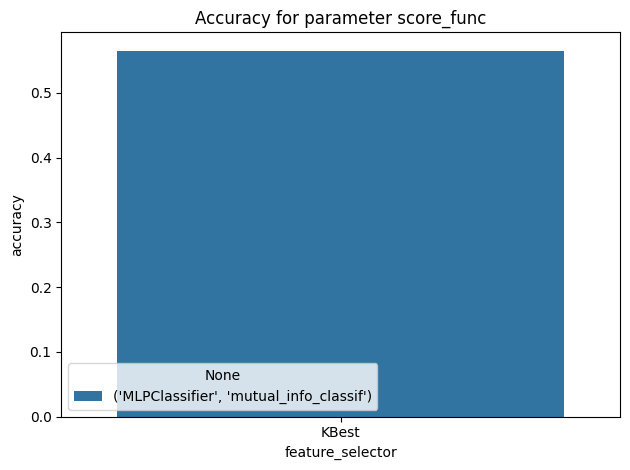

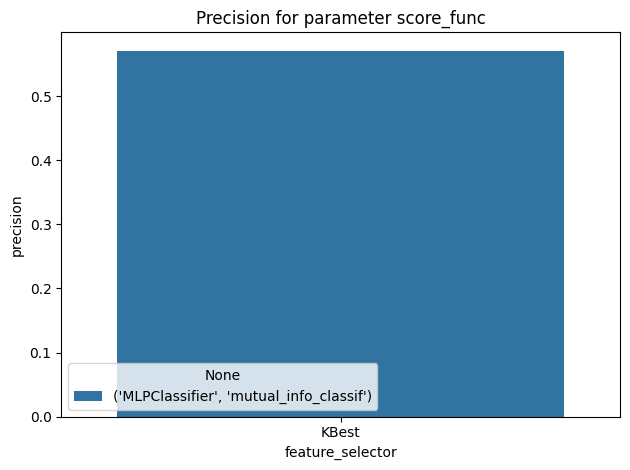

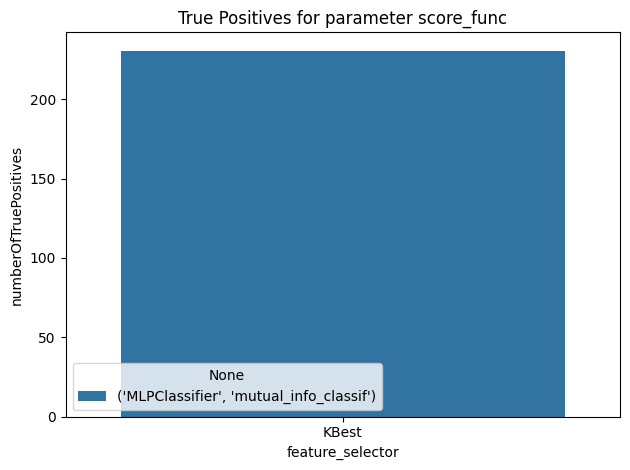

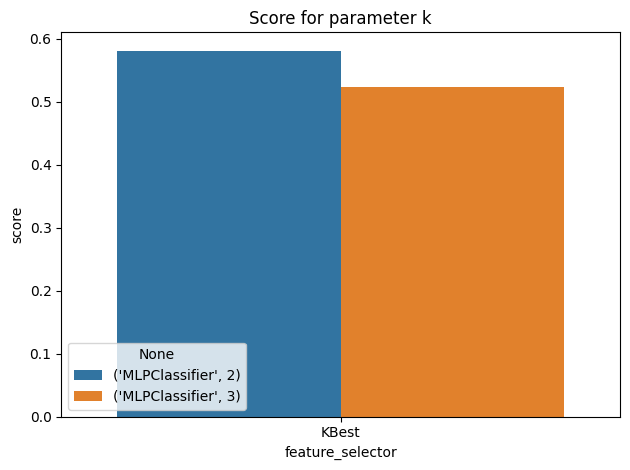

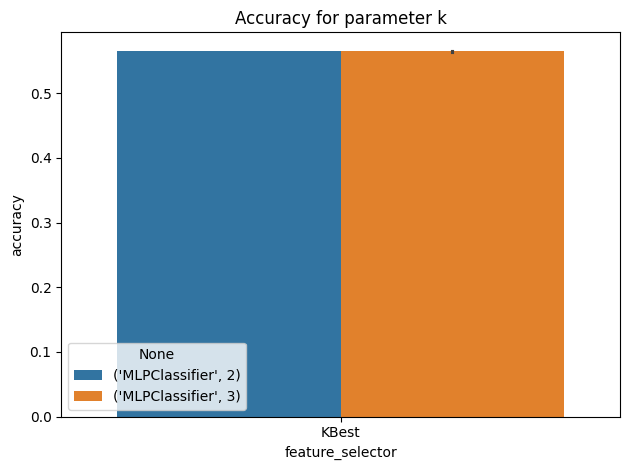

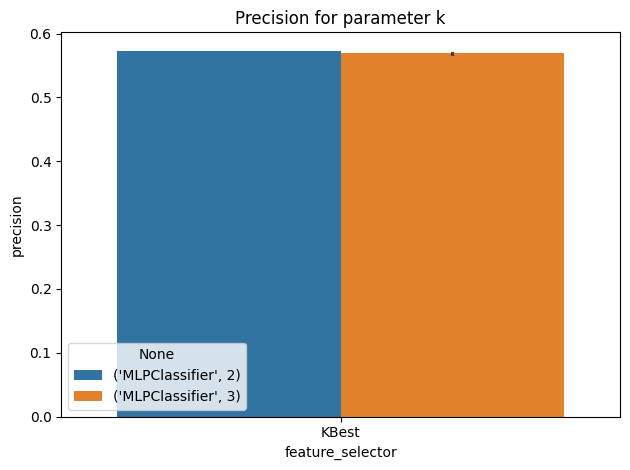

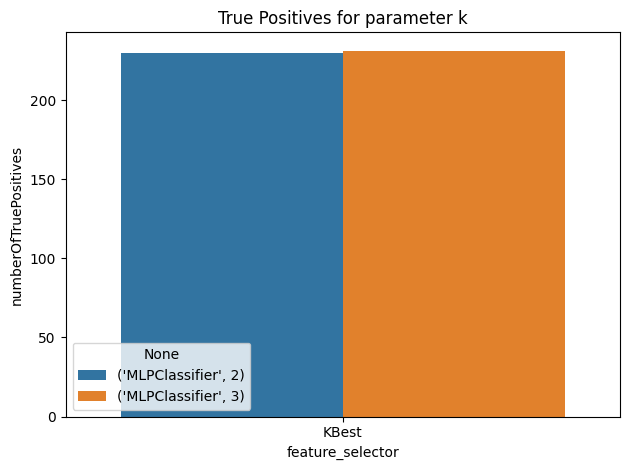

CPU times: total: 4.97 s
Wall time: 10.5 s


In [44]:
%%time
processedResultsDf, parameters = functions.extractParameterResultsArr(
    resultsDf,
    [models, featureSelectors, scalers, featureGenerators],
    [
        "model_parameters",
        "selector_parameters",
        "scaler_parameters",
        "feature_generator_parameters",
    ],
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

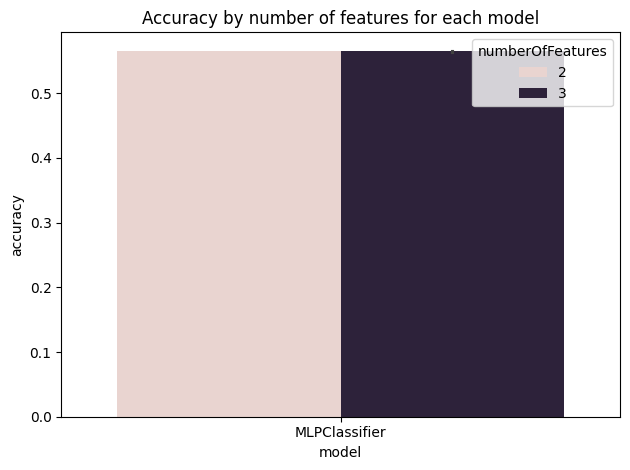

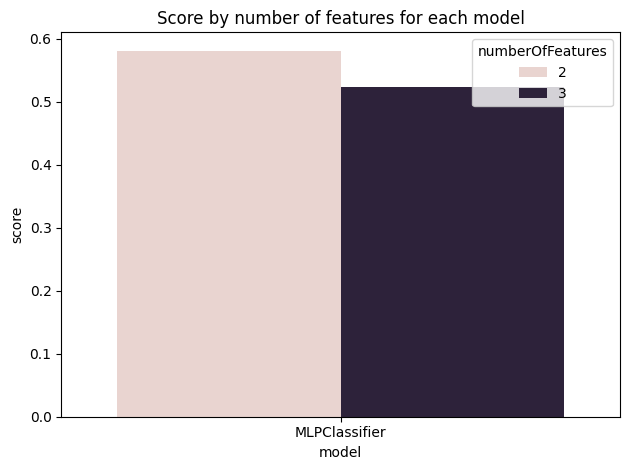

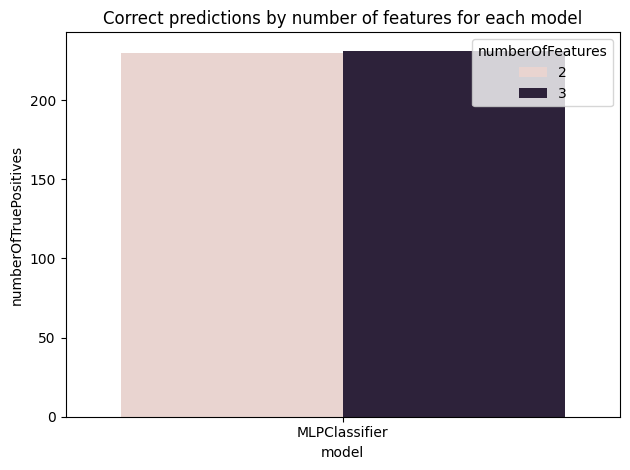

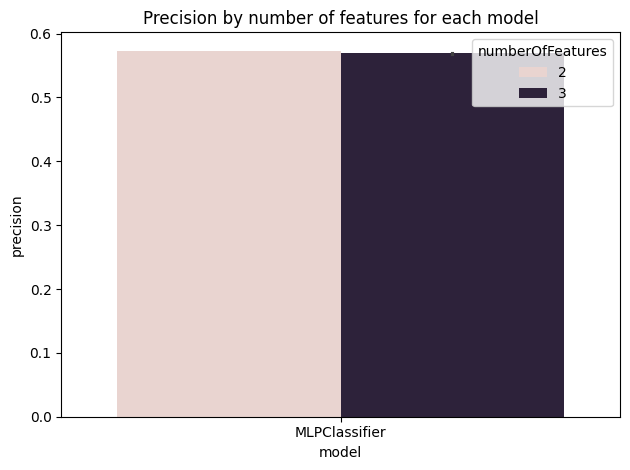

In [45]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

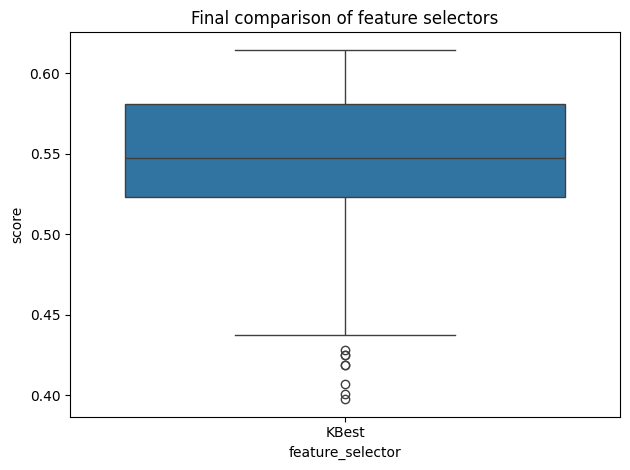

In [46]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

<Axes: xlabel='model', ylabel='score'>

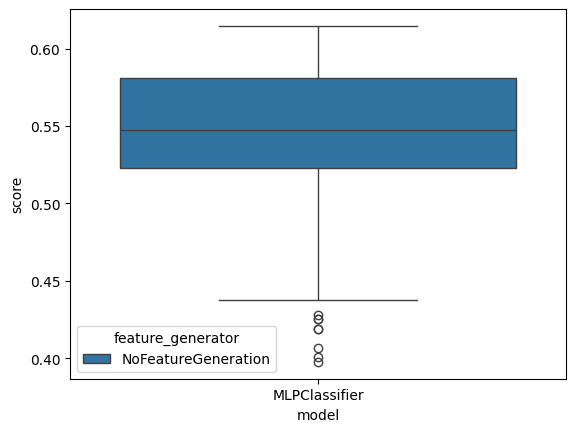

In [47]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="feature_generator")

<Axes: xlabel='model', ylabel='score'>

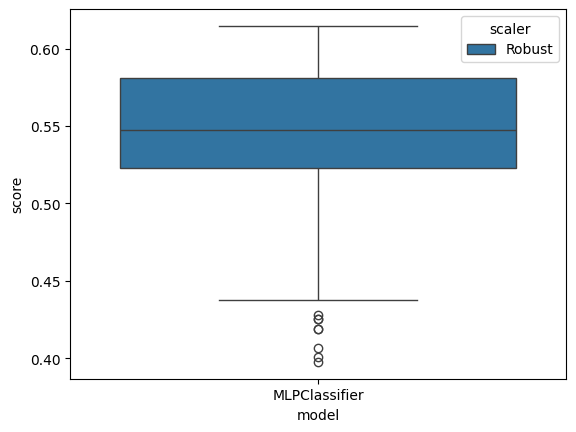

In [48]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="scaler")

### Final Results for Models

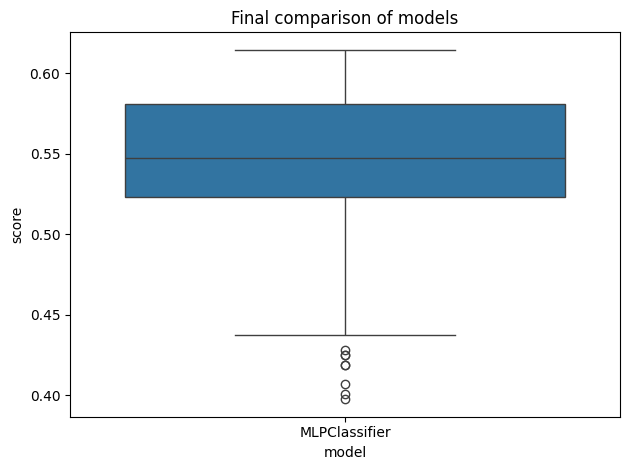

In [49]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")
plt.tight_layout()
plt.show()

### Final Results

In [50]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 1.97 ms


In [51]:
processedResultsDf[
    processedResultsDf["model"] == functions.ModelType.XGBoost.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_activation, model_parameters_alpha, model_parameters_random_state, model_parameters_learning_rate, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_max_iter, model_parameters_solver, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 23 columns]

In [52]:
processedResultsDf.sort_values(by="numberOfTruePositives", ascending=False).head(5)

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
1357  0.614679                    241  0.566061   0.605042                 2   
1173  0.611621                    240  0.565455   0.600815                 2   
2015  0.550459                    240  0.565455   0.571843                 3   
1697  0.550459                    240  0.556970   0.563910                 3   
1942  0.550459                    240  0.559394   0.561549                 3   

              model                                   model_parameters  \
1357  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   
1173  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   
2015  MLPClassifier  {'activation': 'relu', 'solver': 'adam', 'alph...   
1697  MLPClassifier  {'activation': 'relu', 'solver': 'adam', 'alph...   
1942  MLPClassifier  {'activation': 'relu', 'solver': 'adam', 'alph...   

     feature_selector                                selector_parameters  \
1357            KBest  {'score_func': <function mutual_info_classif a...   
1173            KBest  {'score_func': <function mutual_info_classif a...   
2015            KBest  {'score_func': <function mutual_info_classif a...   
1697            KBest  {'score_func': <function mutual_info_classif a...   
1942            KBest  {'score_func': <function mutual_info_classif a...   

      scaler  ... model_parameters_activation model_parameters_alpha  \
1357  Robust  ...                        tanh                   0.15   
1173  Robust  ...                        tanh                   0.20   
2015  Robust  ...                        relu                   0.20   
1697  Robust  ...                        relu                   0.10   
1942  Robust  ...                        relu                   0.20   

     model_parameters_random_state model_parameters_learning_rate  \
1357                            42                       adaptive   
1173                            42                       adaptive   
2015                            42                       adaptive   
1697                            42                       adaptive   
1942                            42                       adaptive   

      model_parameters_learning_rate_init  \
1357                                0.009   
1173                                0.008   
2015                                0.008   
1697                                0.005   
1942                                0.003   

      model_parameters_hidden_layer_sizes model_parameters_max_iter  \
1357                               (100,)                      1600   
1173                               (100,)                      1600   
2015                                (22,)                      1600   
1697                                (26,)                      1600   
1942                                (17,)                      1600   

      model_parameters_solver selector_parameters_score_func  \
1357                     adam            mutual_info_classif   
1173                     adam            mutual_info_classif   
2015                     adam            mutual_info_classif   
1697                     adam            mutual_info_classif   
1942                     adam            mutual_info_classif   

      selector_parameters_k  
1357                      2  
1173                      2  
2015                      3  
1697                      3  
1942                      3  

[5 rows x 23 columns]

In [53]:
processedResultsDf[
    processedResultsDf["feature_generator"]
    == functions.FeatureGenerator.Polynomial.name
].sort_values(by="numberOfTruePositives", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_activation, model_parameters_alpha, model_parameters_random_state, model_parameters_learning_rate, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_max_iter, model_parameters_solver, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 23 columns]

In [54]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_activation, model_parameters_alpha, model_parameters_random_state, model_parameters_learning_rate, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_max_iter, model_parameters_solver, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 23 columns]

In [55]:
filteredDf["scaler"]

1357    Robust
Name: scaler, dtype: object

In [56]:
filteredDf["model_parameters"].to_numpy()

array([{'activation': 'tanh', 'solver': 'adam', 'alpha': 0.15, 'learning_rate': 'adaptive', 'learning_rate_init': 0.009, 'hidden_layer_sizes': (100,), 'max_iter': 1600, 'random_state': 42}],
      dtype=object)

In [57]:
filteredDf["feature_generator"]

1357    NoFeatureGeneration
Name: feature_generator, dtype: object

In [58]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
1357  0.614679                    241  0.566061   0.605042                 2   

              model                                   model_parameters  \
1357  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   

     feature_selector                                selector_parameters  \
1357            KBest  {'score_func': <function mutual_info_classif a...   

      scaler  ... model_parameters_activation model_parameters_alpha  \
1357  Robust  ...                        tanh                   0.15   

     model_parameters_random_state model_parameters_learning_rate  \
1357                            42                       adaptive   

      model_parameters_learning_rate_init  \
1357                                0.009   

      model_parameters_hidden_layer_sizes model_parameters_max_iter  \
1357                               (100,)                      1600   

      model_parameters_solver selector_parameters_score_func  \
1357                     adam            mutual_info_classif   

      selector_parameters_k  
1357                      2  

[1 rows x 23 columns]

In [59]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 2.06 ms


In [60]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_activation, model_parameters_alpha, model_parameters_random_state, model_parameters_learning_rate, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_max_iter, model_parameters_solver, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 23 columns]

In [61]:
filteredDf["scaler"]

1357    Robust
Name: scaler, dtype: object

In [62]:
filteredDf["model_parameters"].to_numpy()

array([{'activation': 'tanh', 'solver': 'adam', 'alpha': 0.15, 'learning_rate': 'adaptive', 'learning_rate_init': 0.009, 'hidden_layer_sizes': (100,), 'max_iter': 1600, 'random_state': 42}],
      dtype=object)

In [63]:
filteredDf["feature_generator"]

1357    NoFeatureGeneration
Name: feature_generator, dtype: object

In [64]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
1357  0.614679                    241  0.566061   0.605042                 2   

              model                                   model_parameters  \
1357  MLPClassifier  {'activation': 'tanh', 'solver': 'adam', 'alph...   

     feature_selector                                selector_parameters  \
1357            KBest  {'score_func': <function mutual_info_classif a...   

      scaler  ... model_parameters_activation model_parameters_alpha  \
1357  Robust  ...                        tanh                   0.15   

     model_parameters_random_state model_parameters_learning_rate  \
1357                            42                       adaptive   

      model_parameters_learning_rate_init  \
1357                                0.009   

      model_parameters_hidden_layer_sizes model_parameters_max_iter  \
1357                               (100,)                      1600   

      model_parameters_solver selector_parameters_score_func  \
1357                     adam            mutual_info_classif   

      selector_parameters_k  
1357                      2  

[1 rows x 23 columns]